# Red wine prediction Project

In [2]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
#from math import sqrt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Target variable is "quality" and it is in integer datatype and other independent variables are in float datatype.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [10]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Visualization

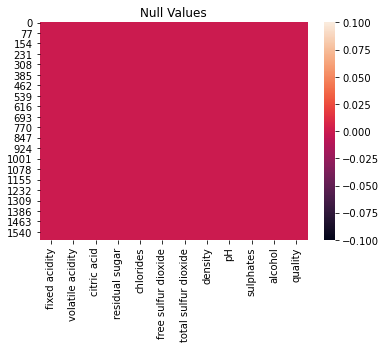

In [13]:
#plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

## To check Correlation

In [14]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

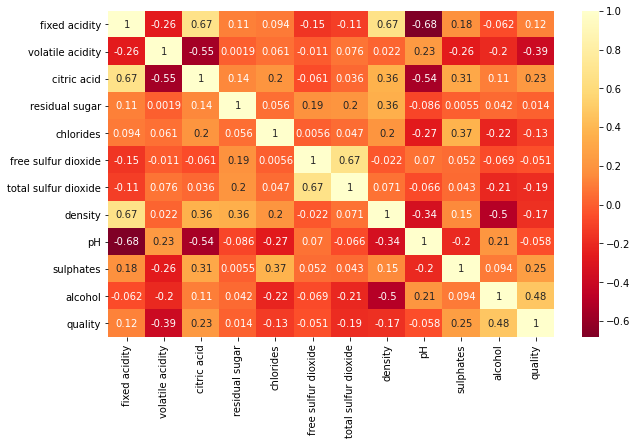

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

#### volatile acidity and alcohol
are the highly correlated columns with the quality.

In [16]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=True)

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

# Plotting Outliers

In [17]:
collist=df.columns.values
collist

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

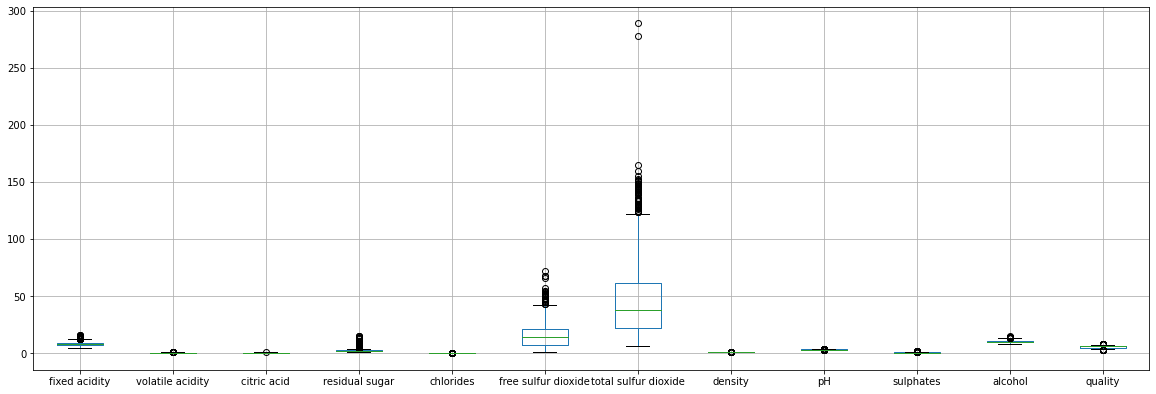

In [18]:
#plotting box plot for the required number of ( 12 )columns
df.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

### Univariate analysis

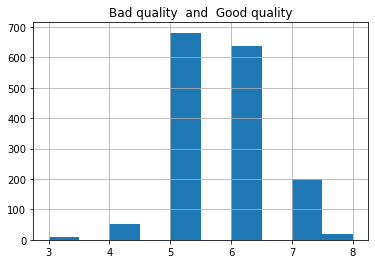

In [64]:
df["quality"].hist(grid=True)
plt.title("Bad quality  and  Good quality")
plt.show()

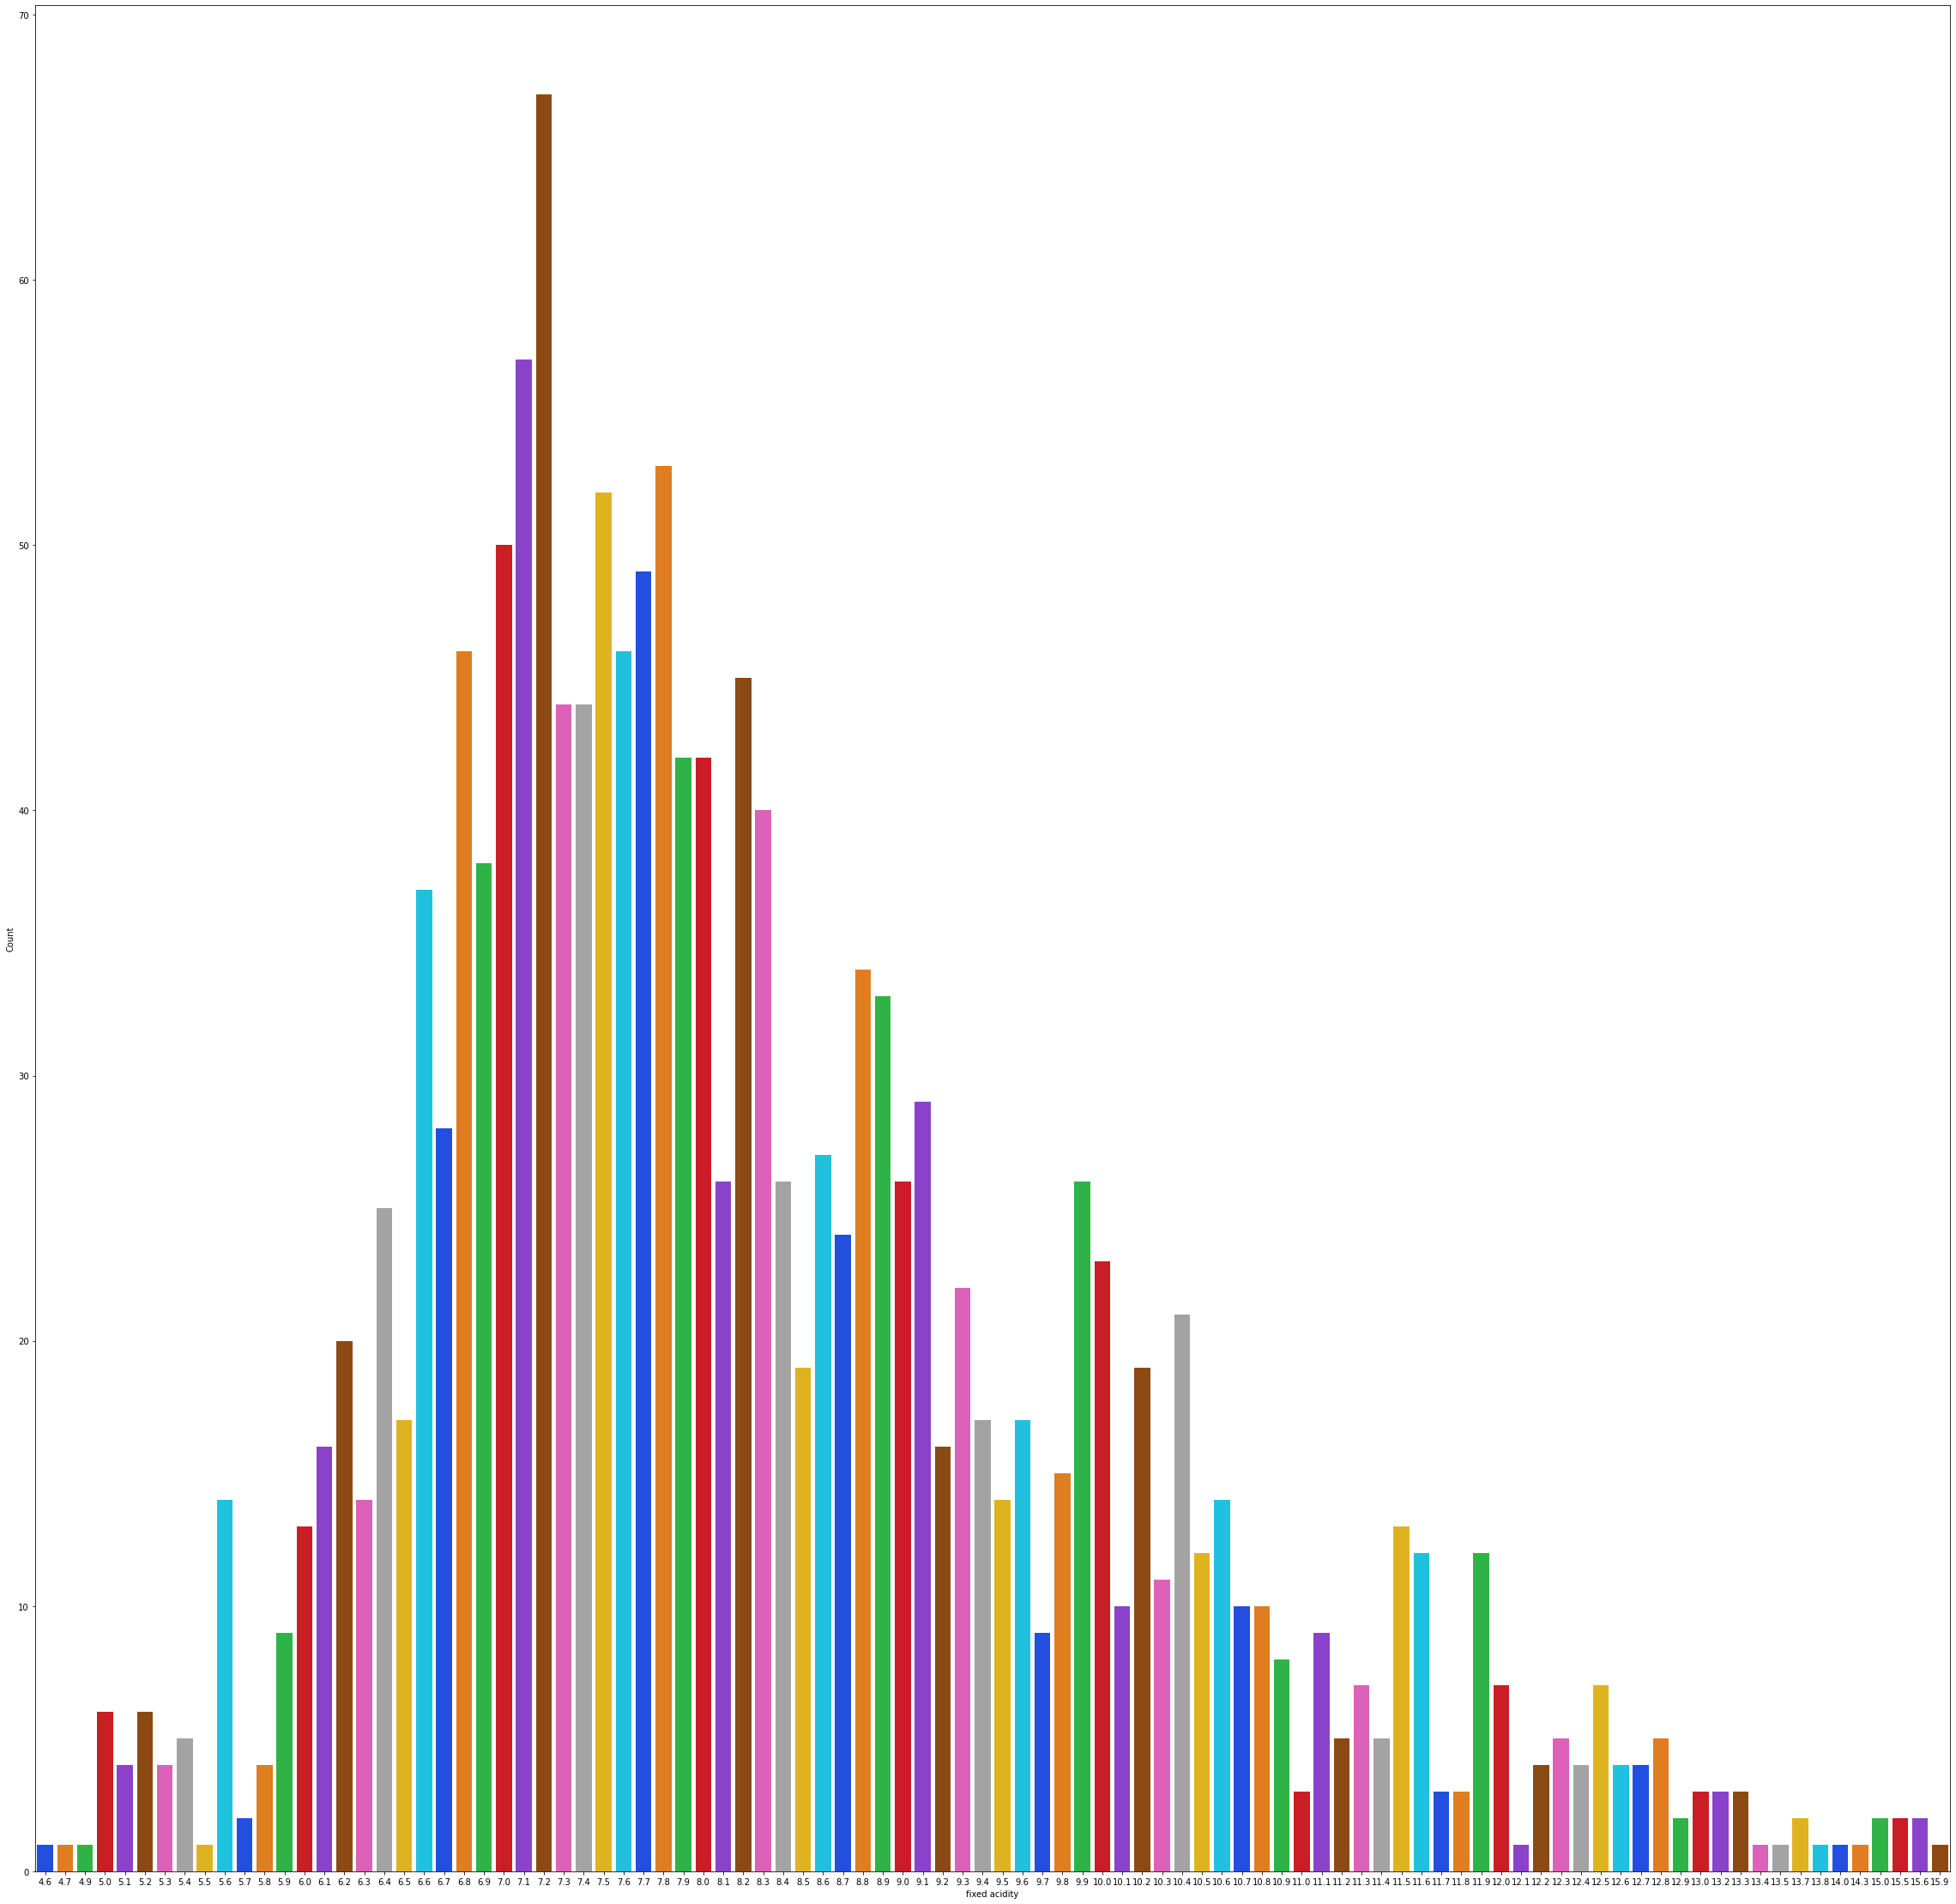

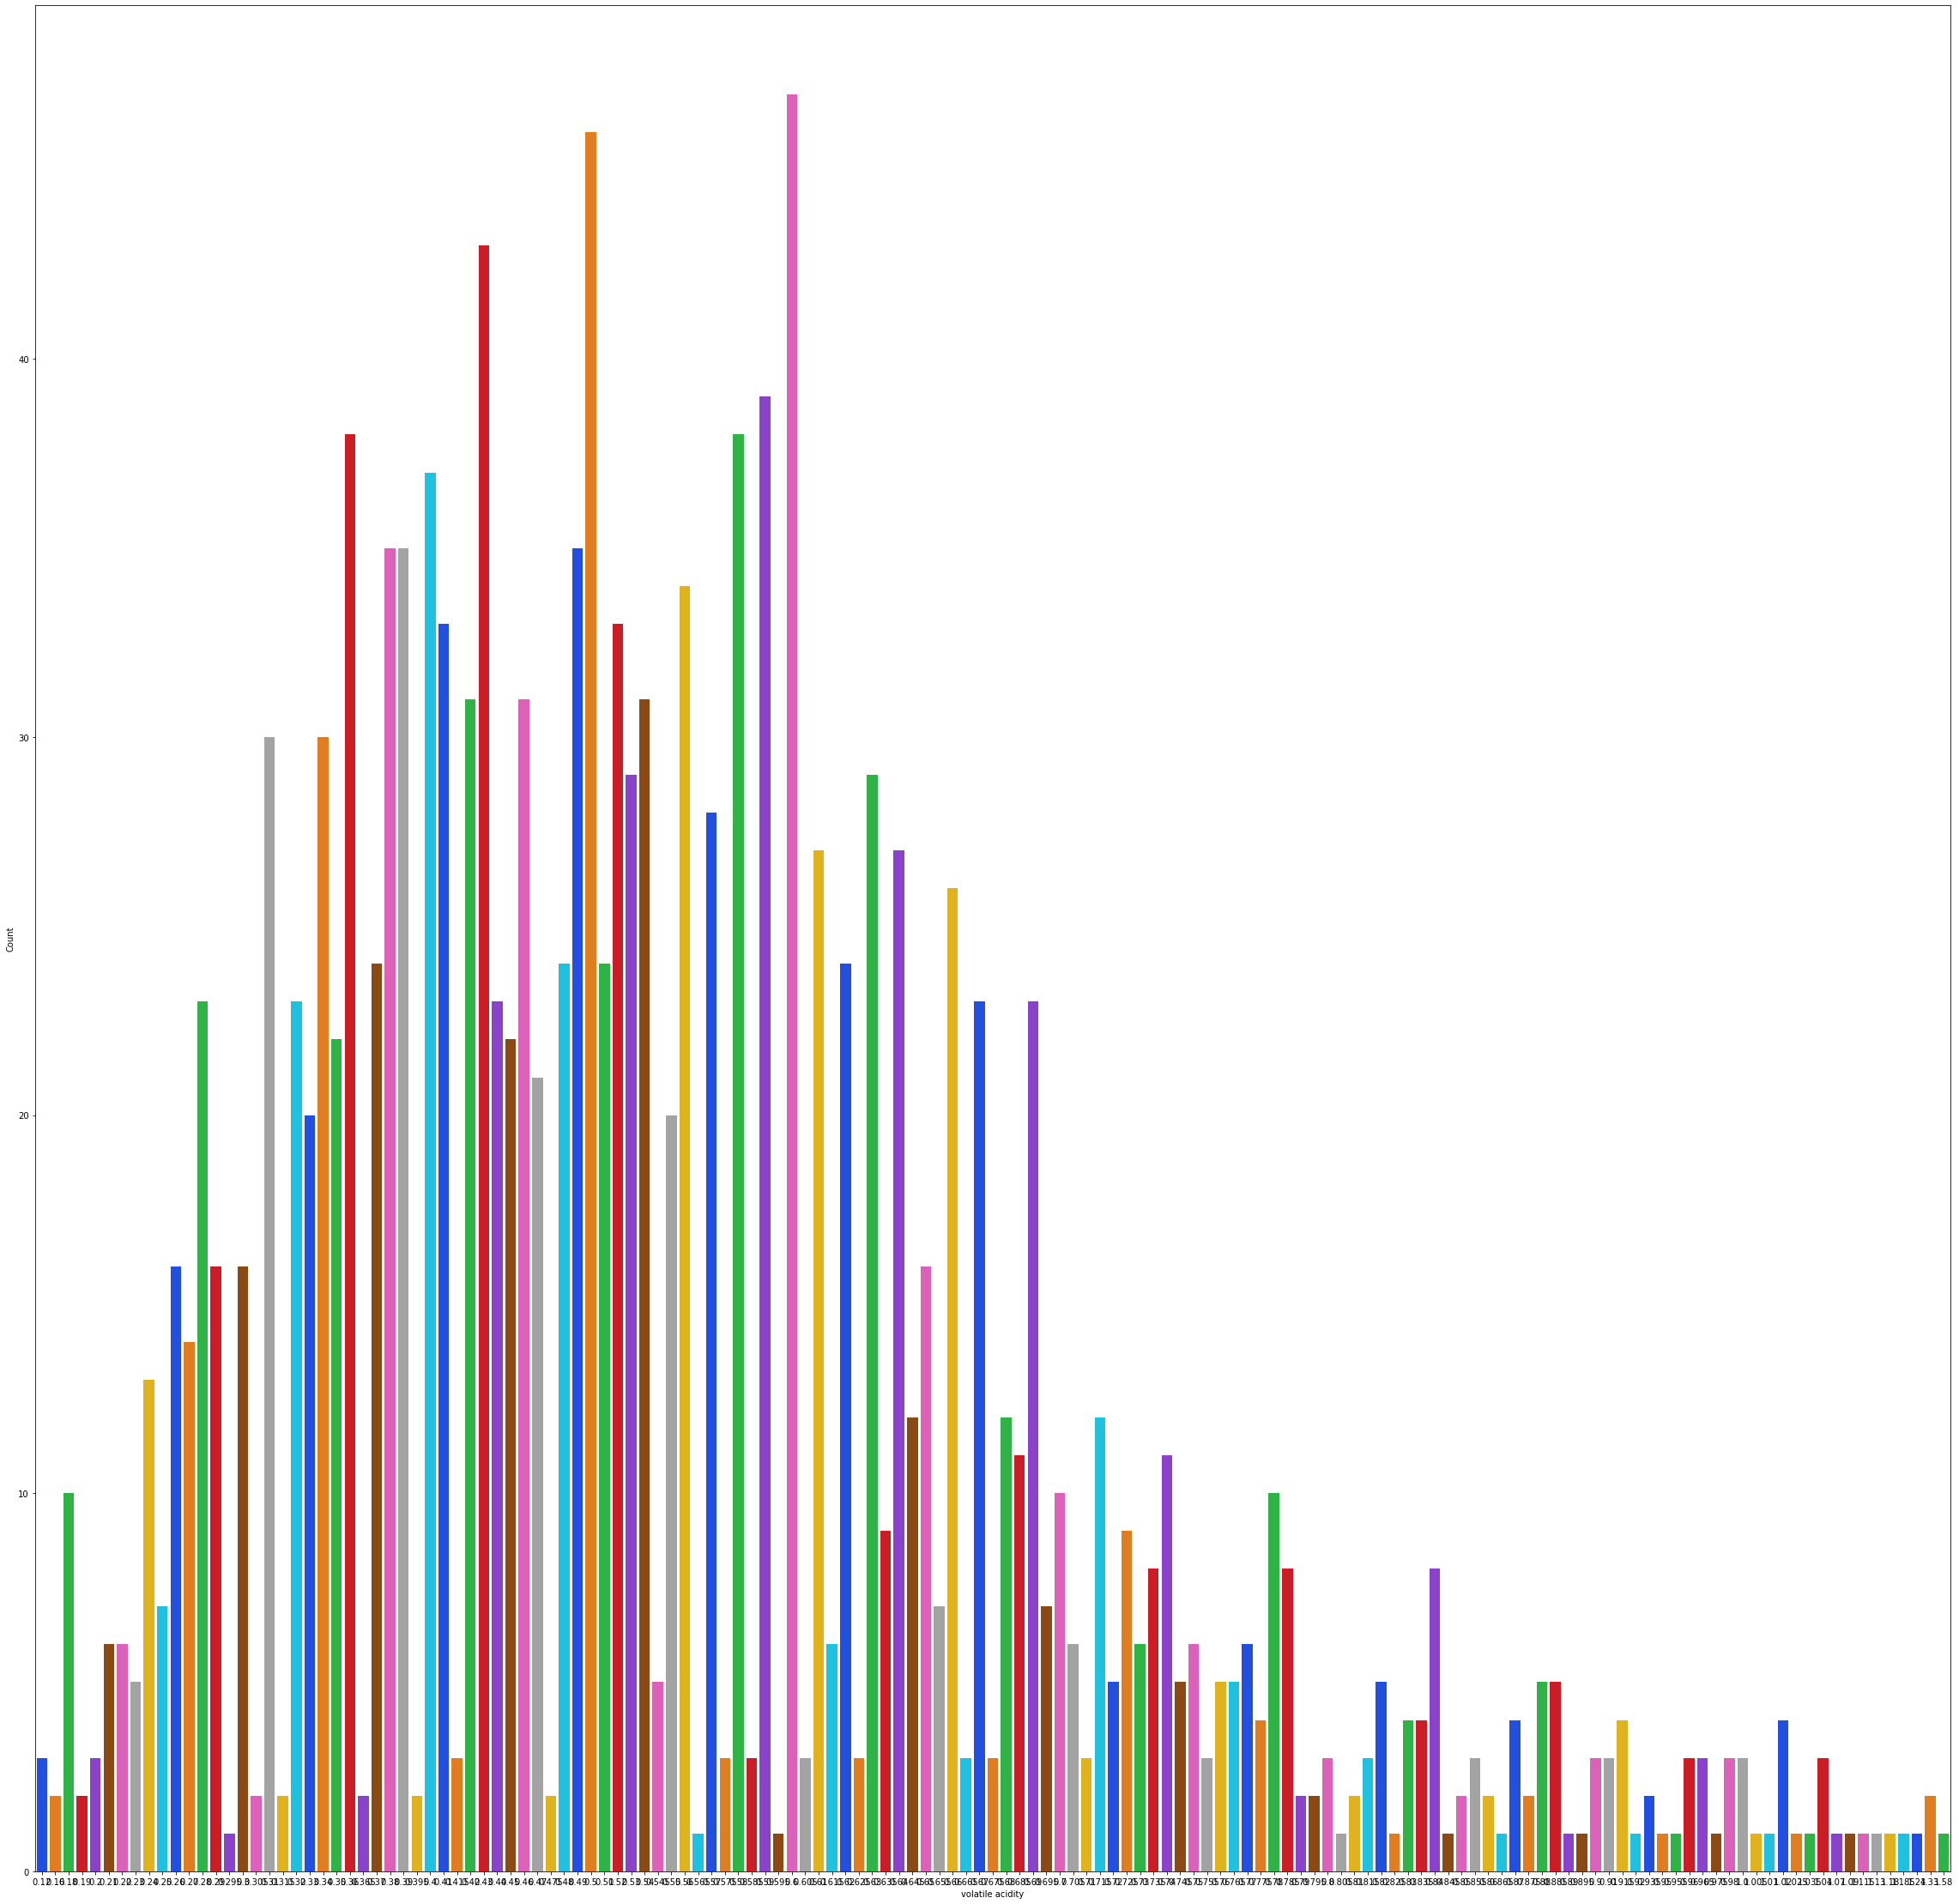

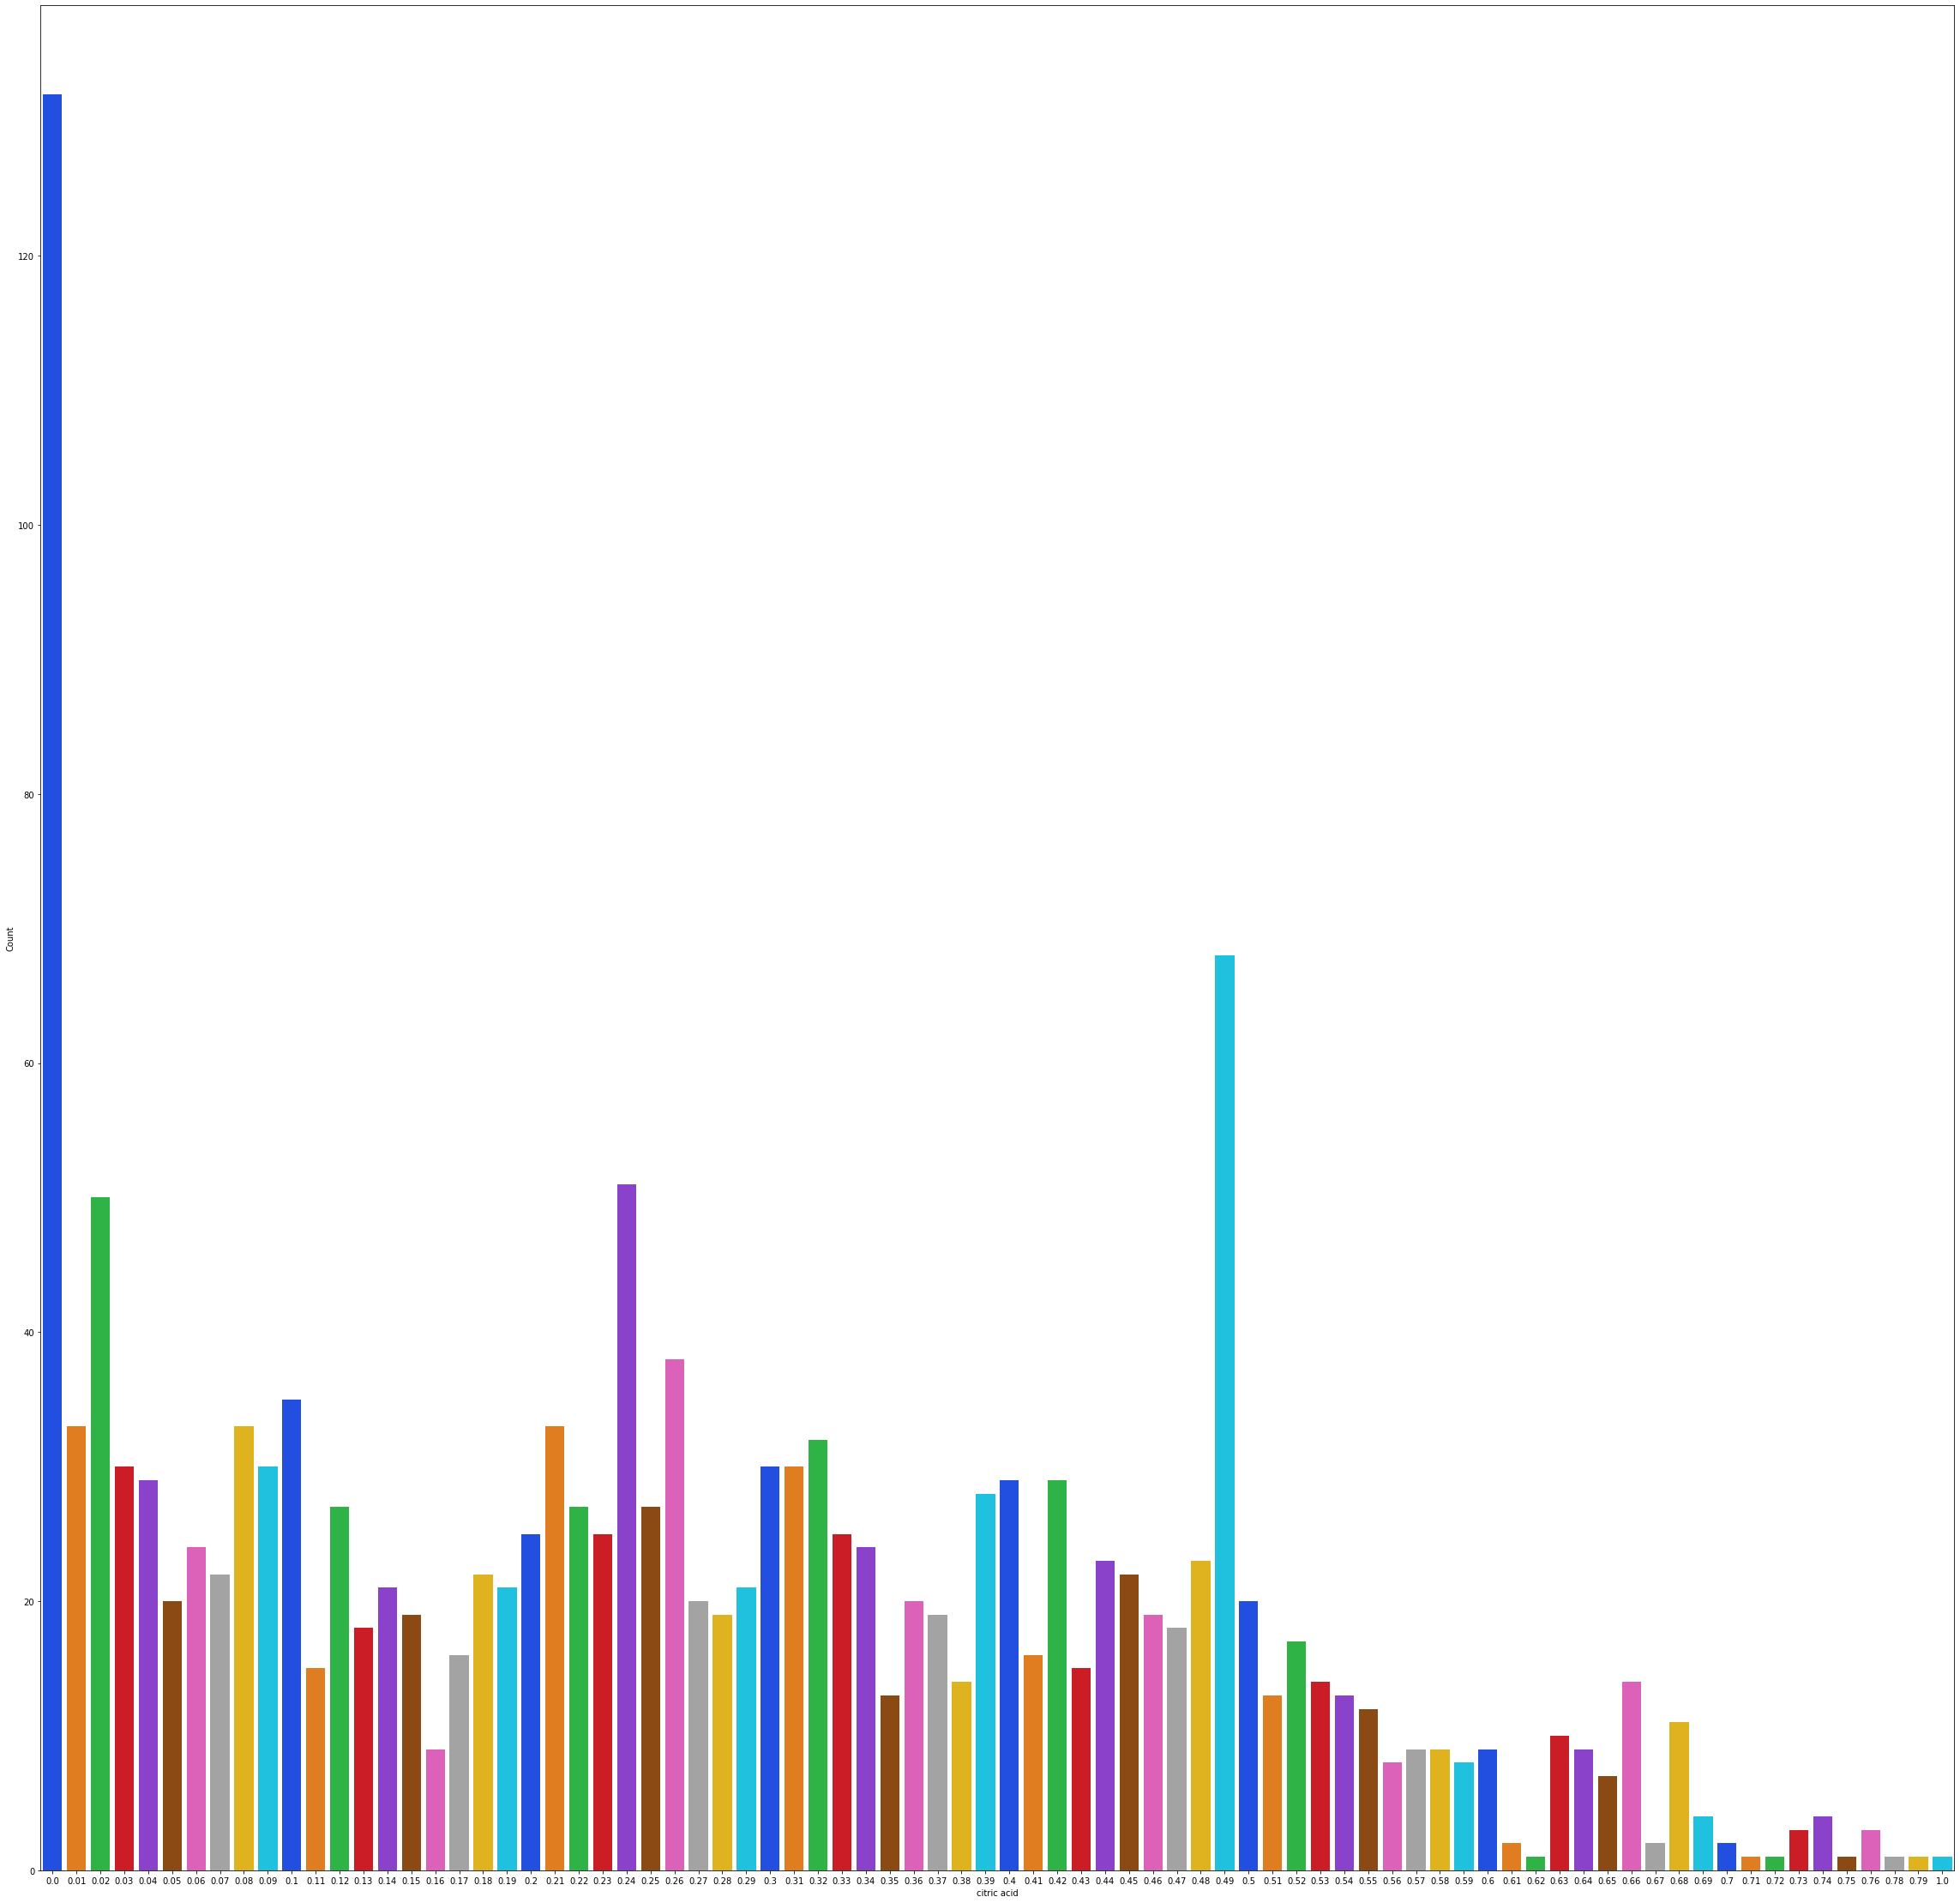

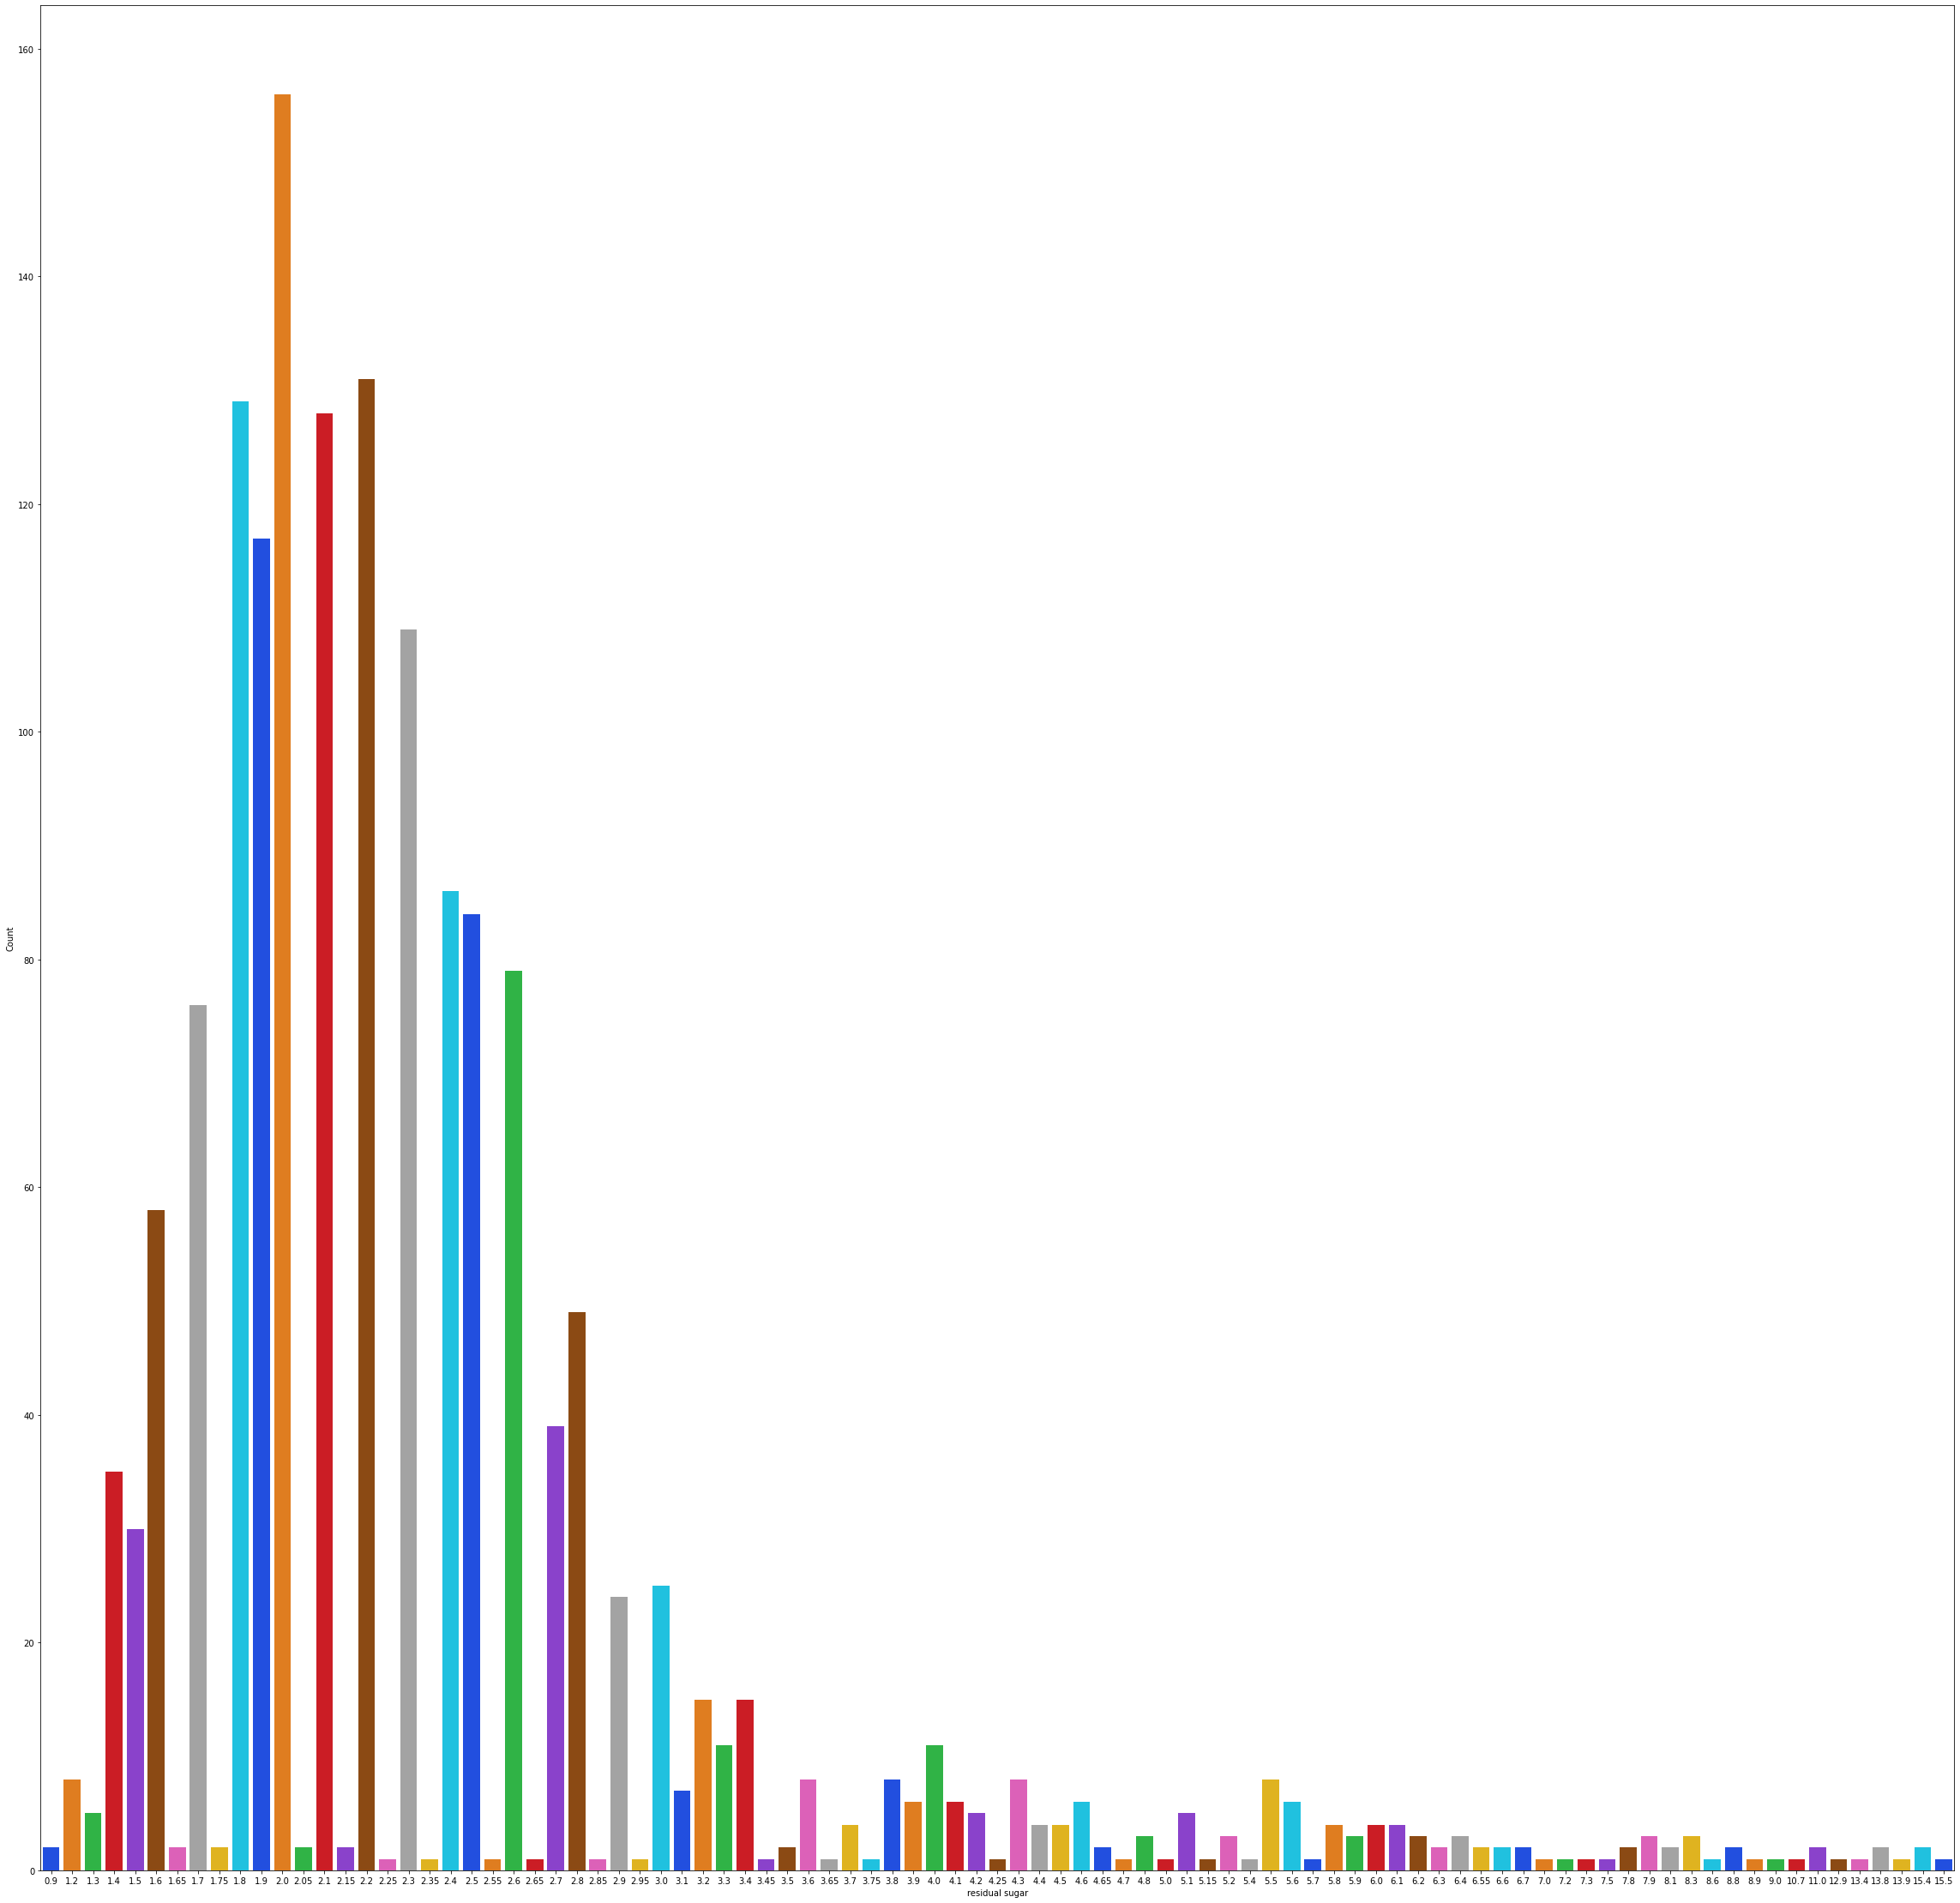

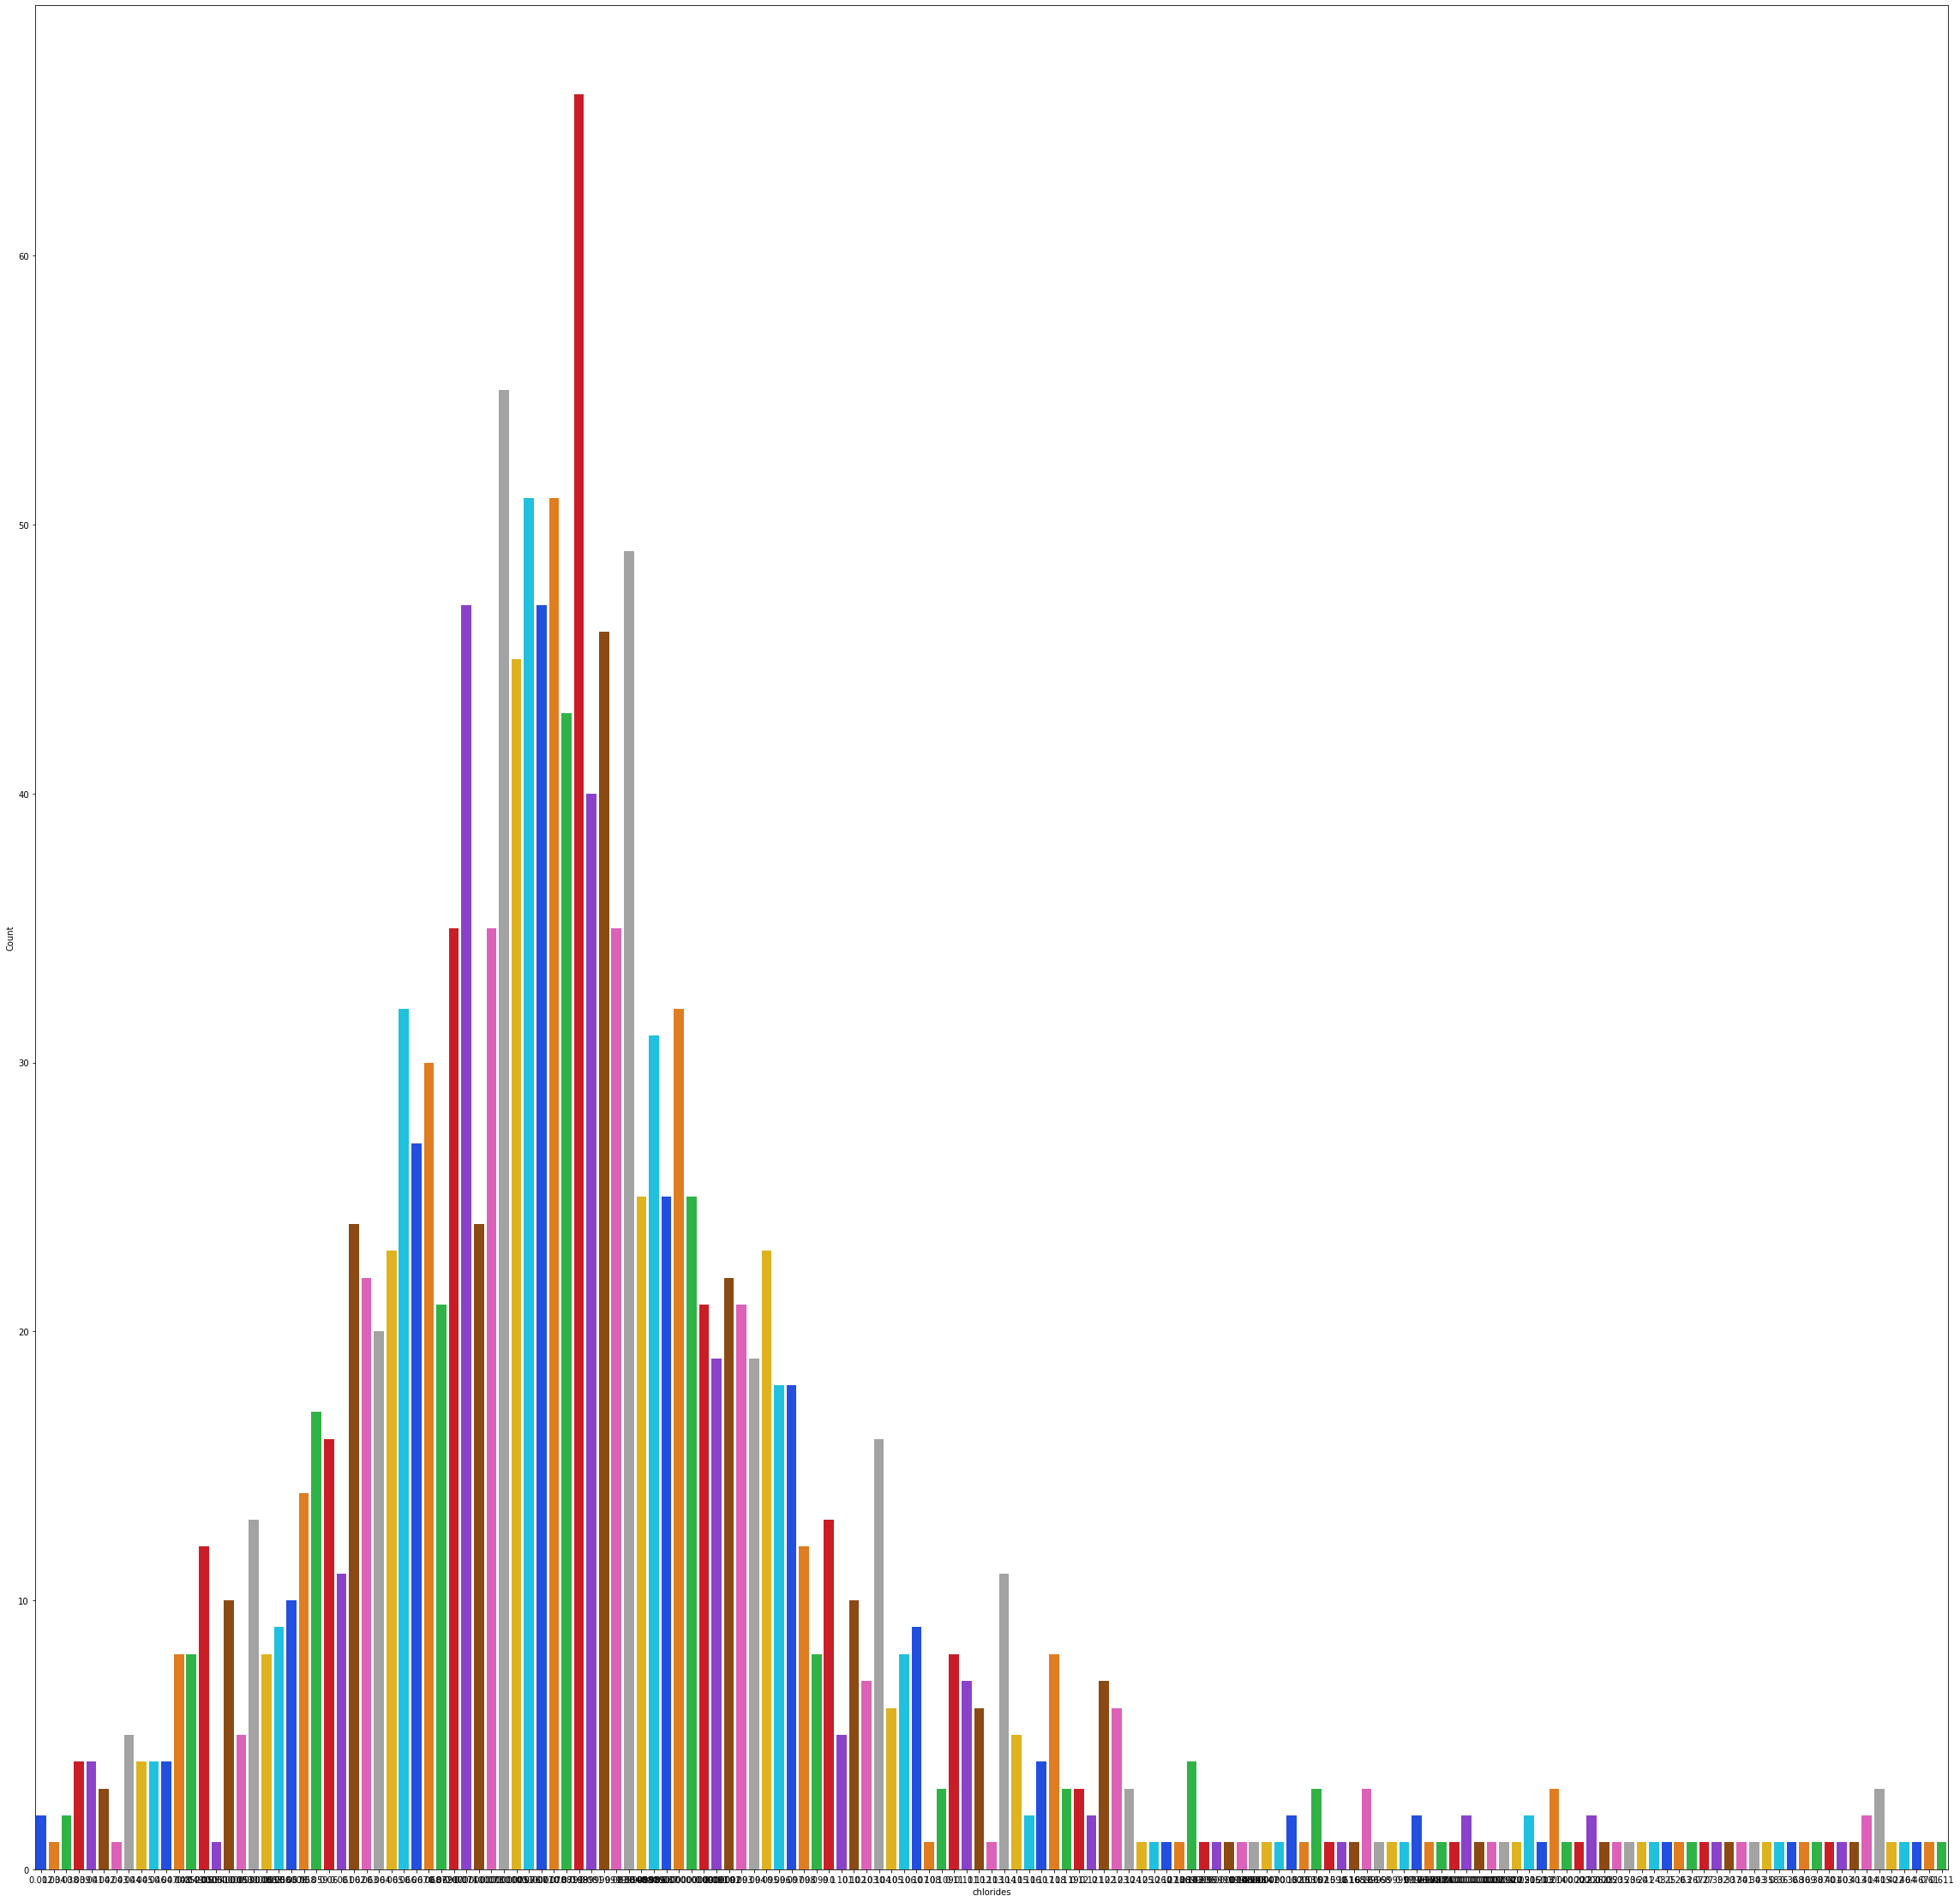

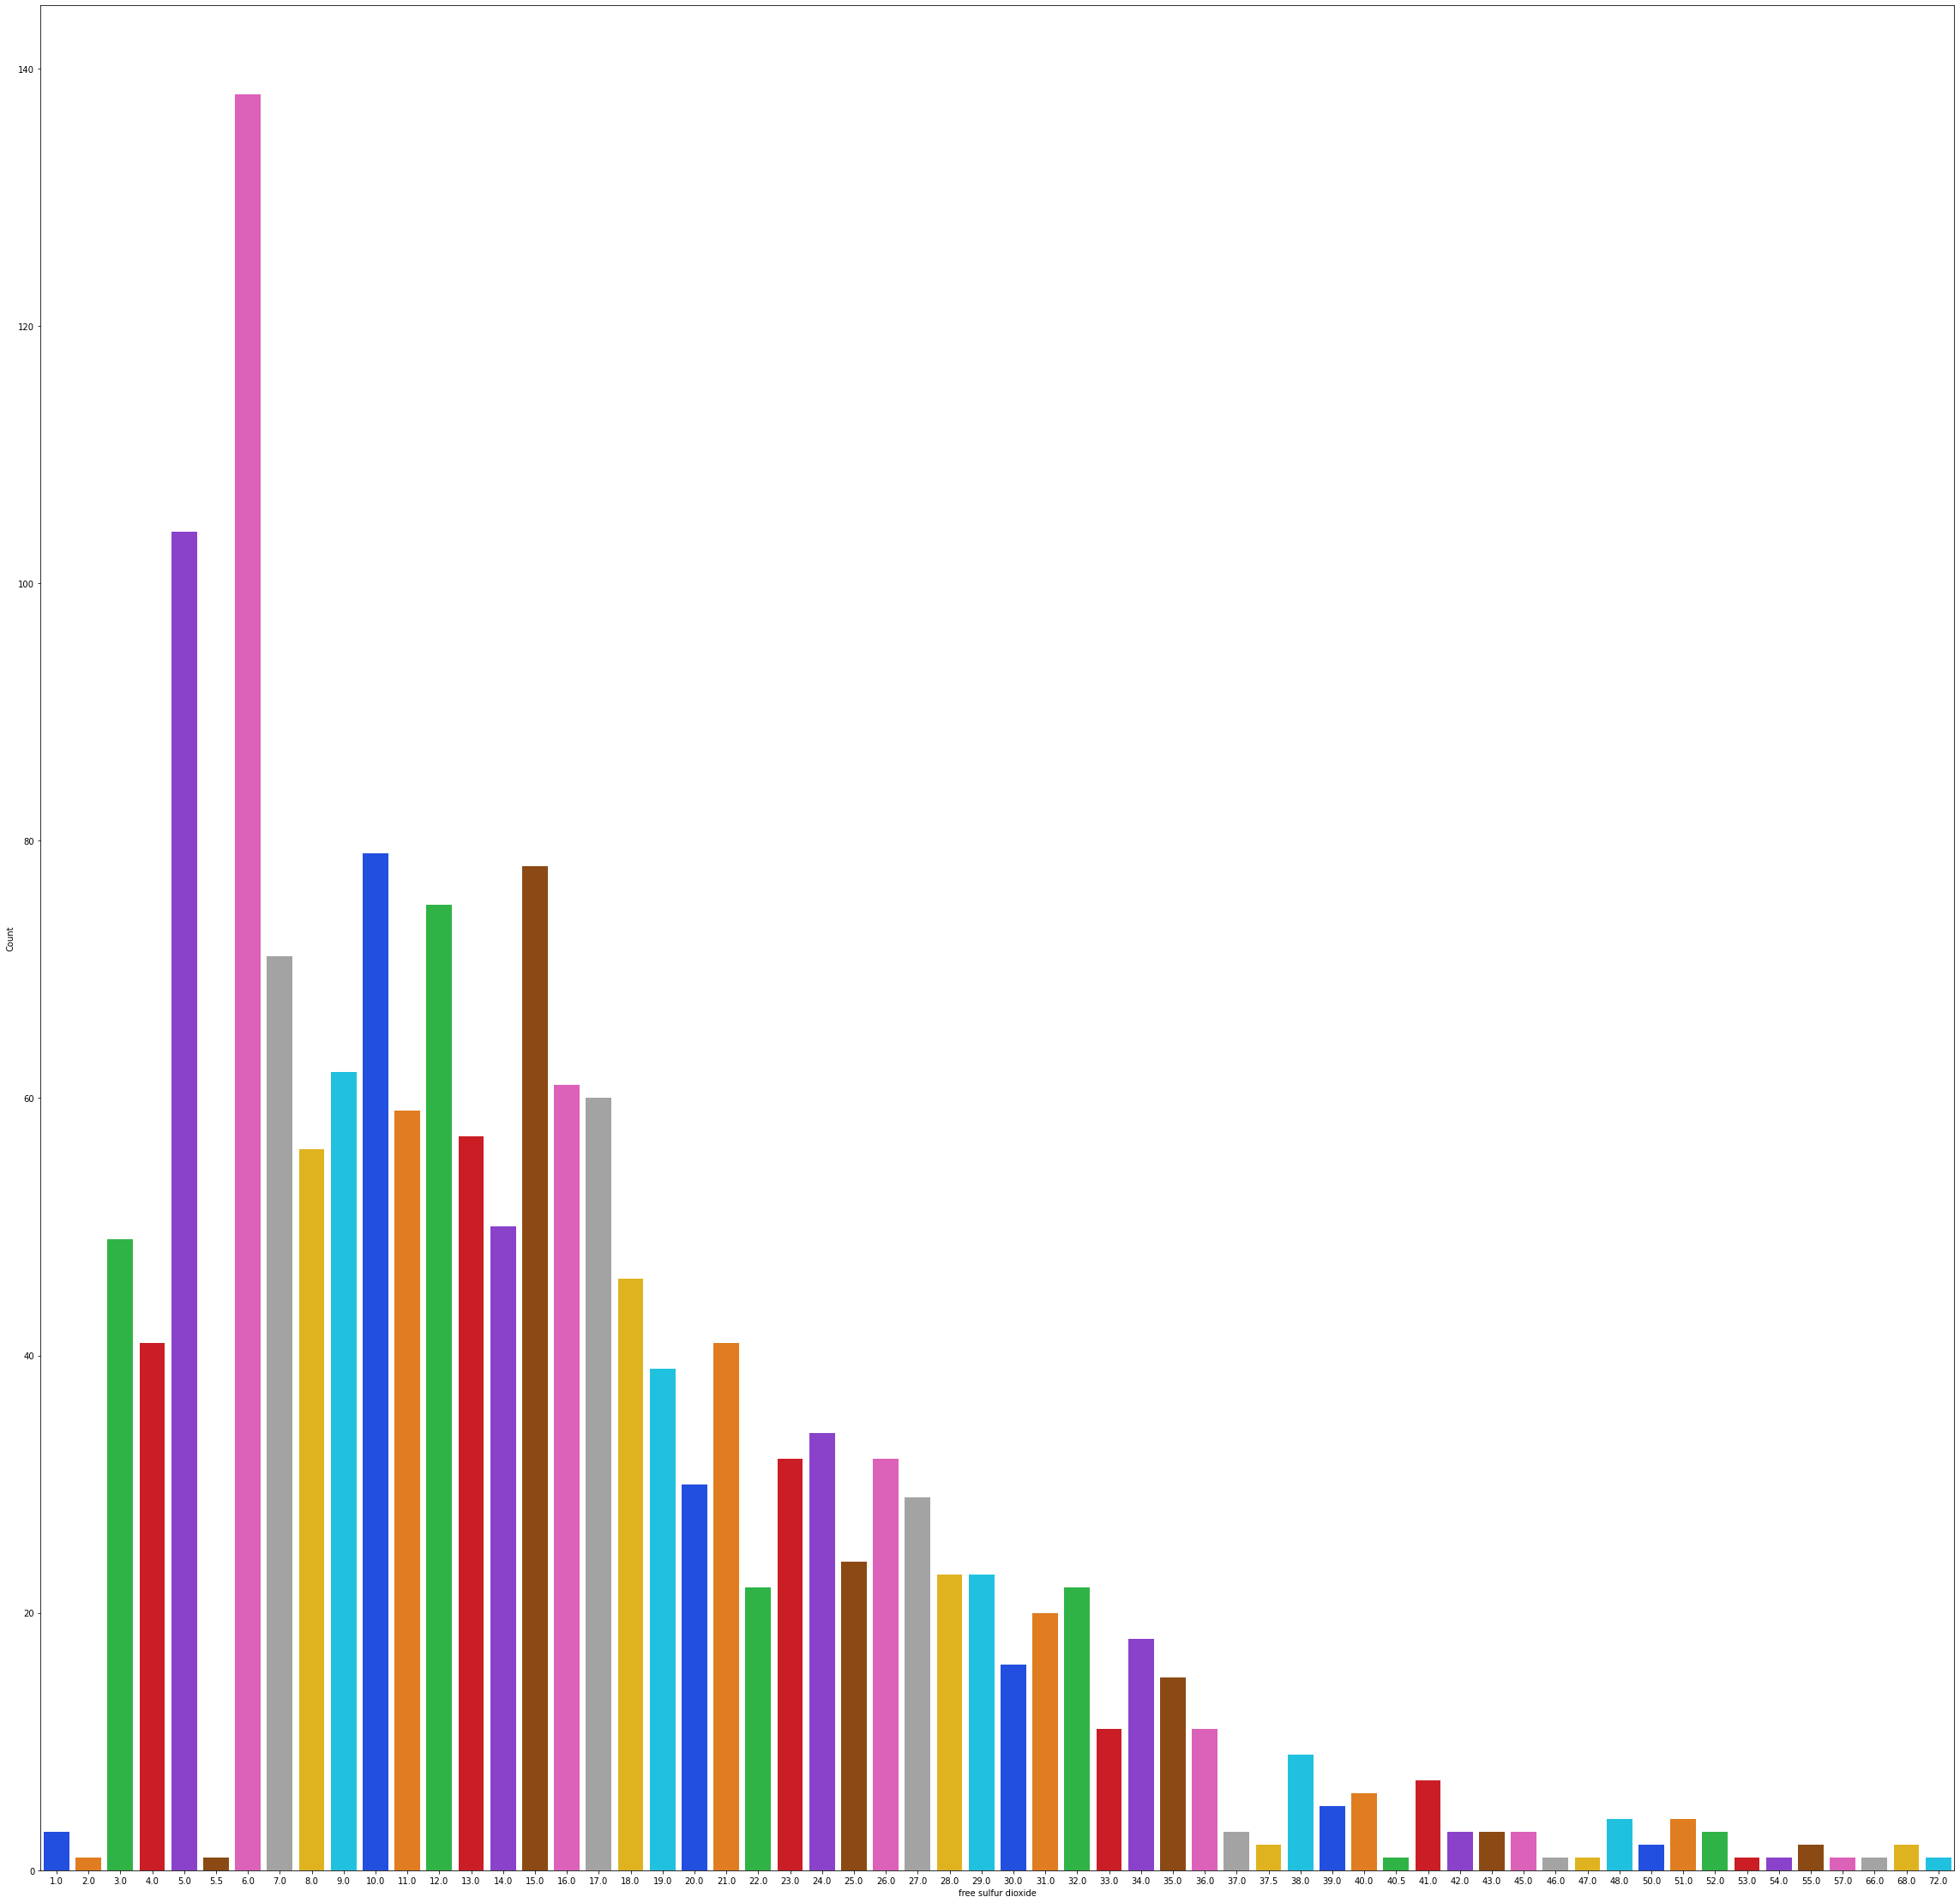

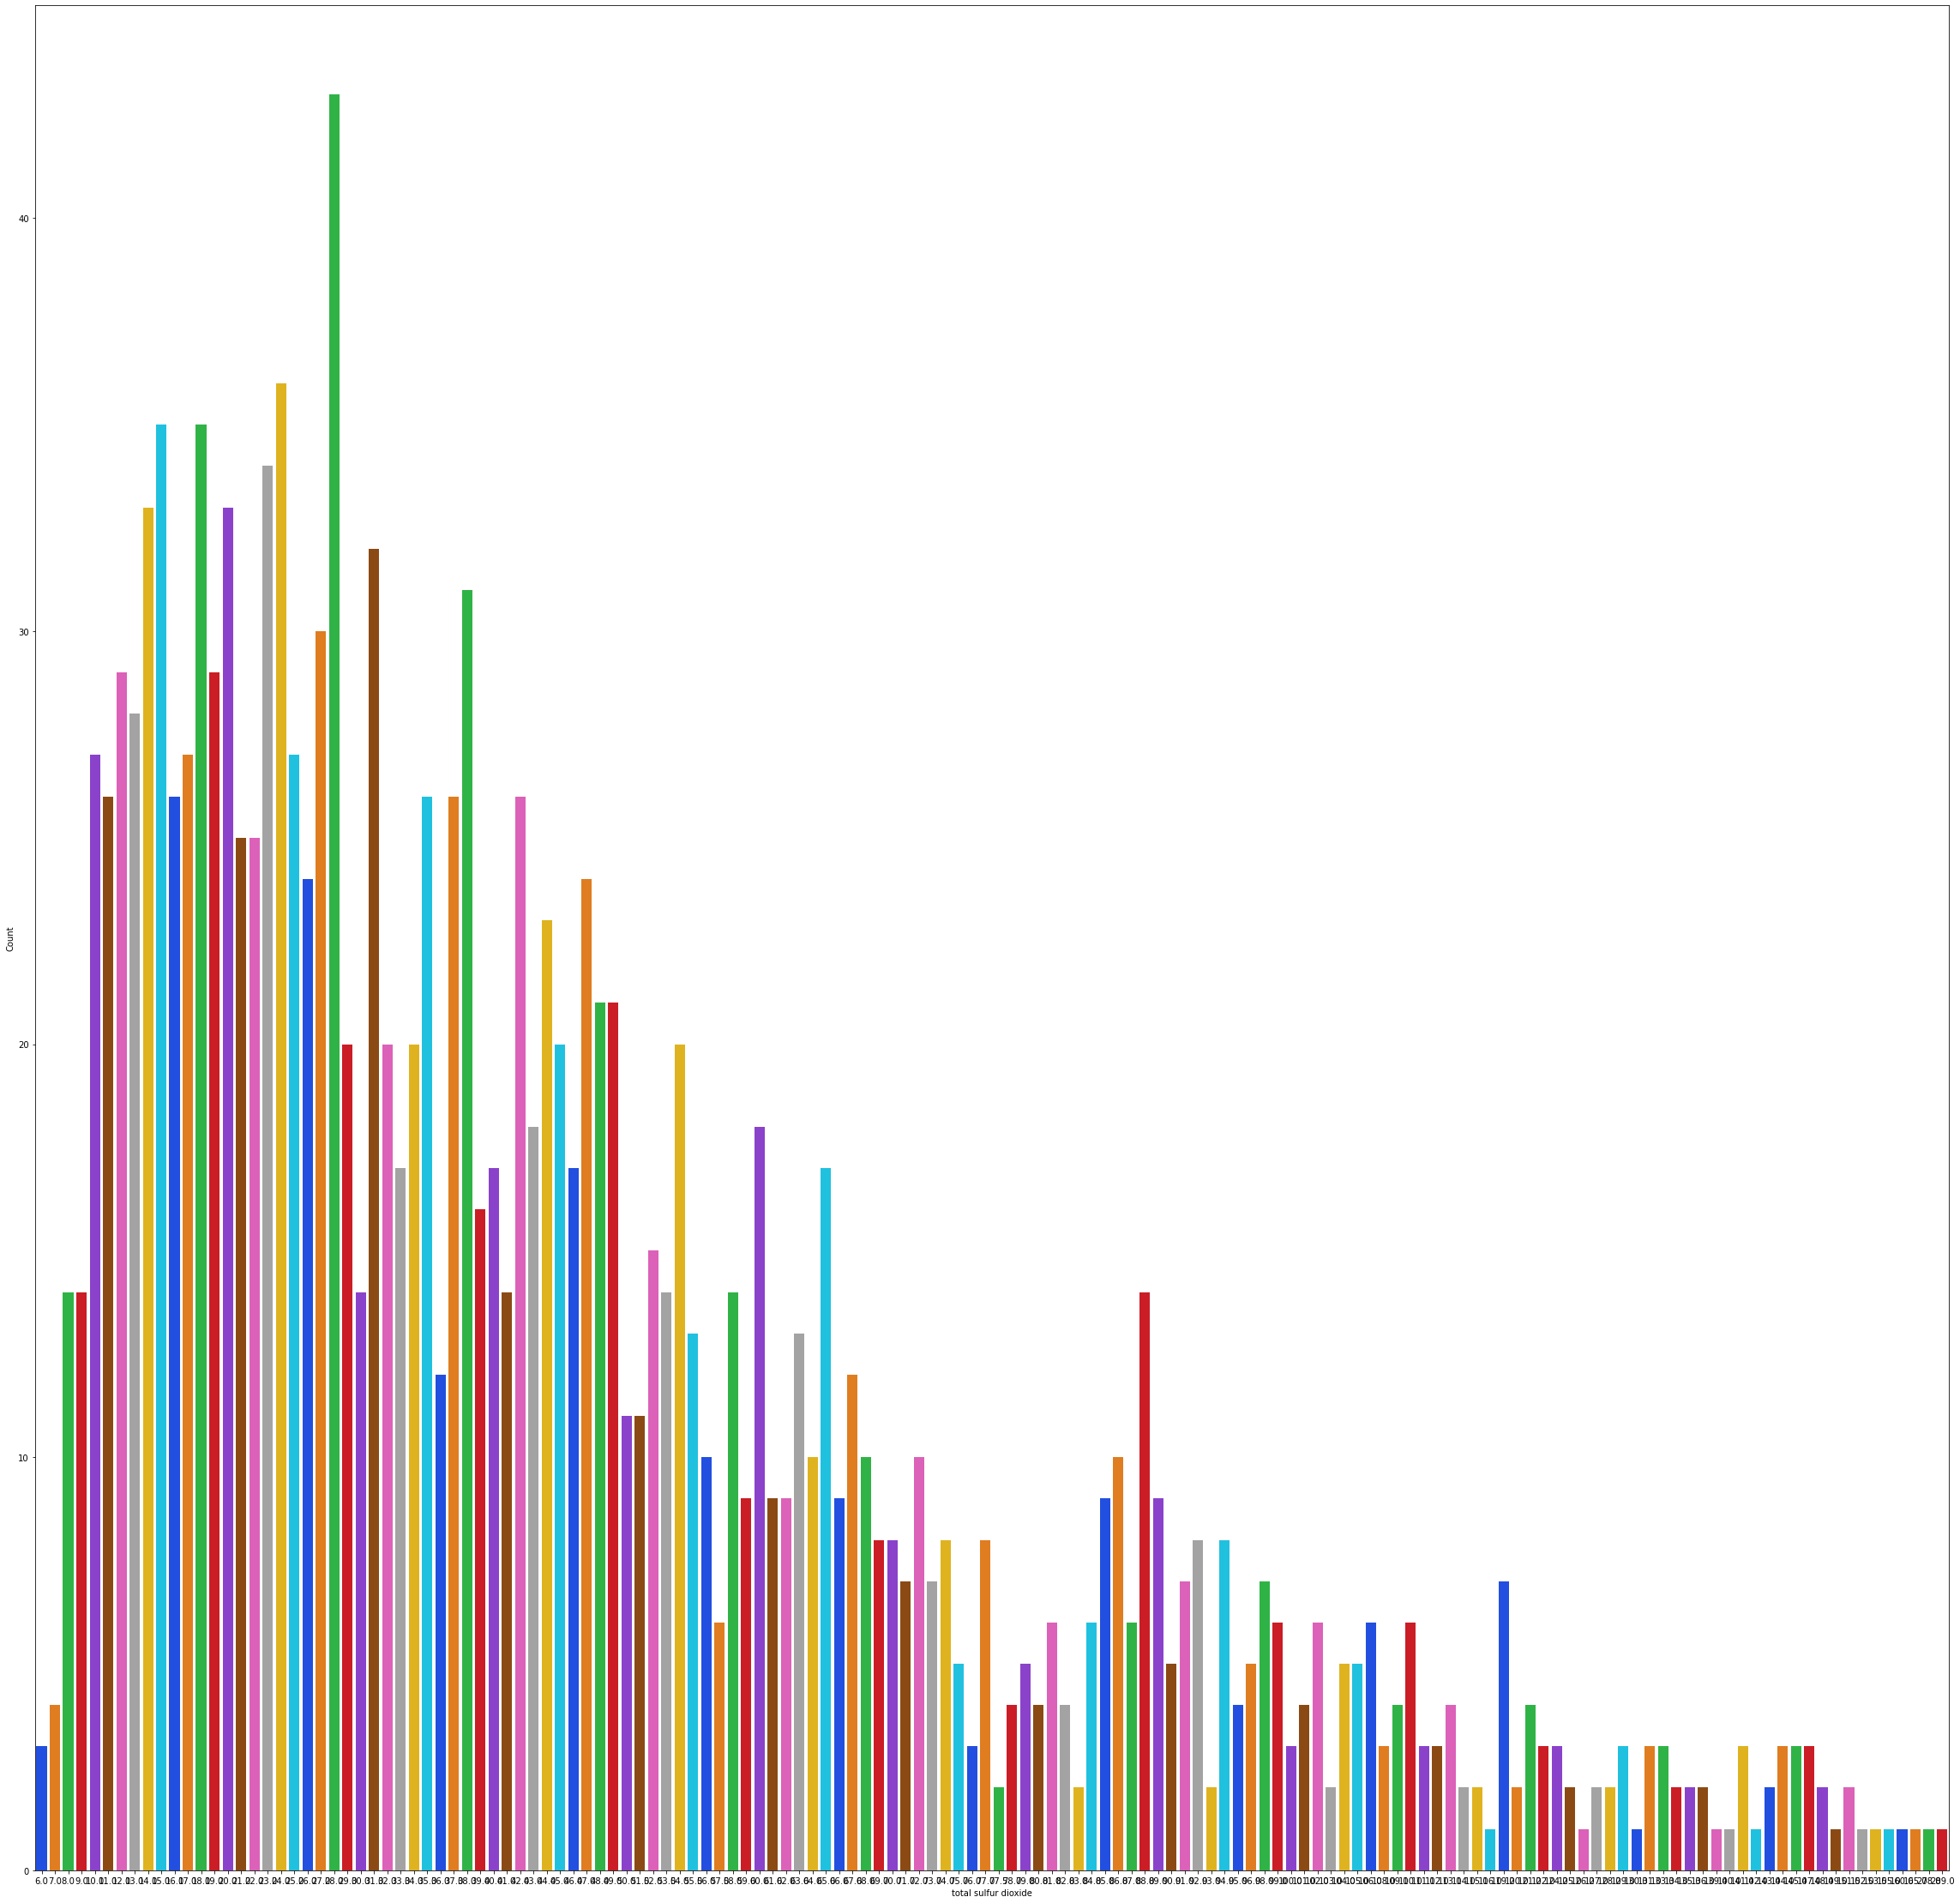

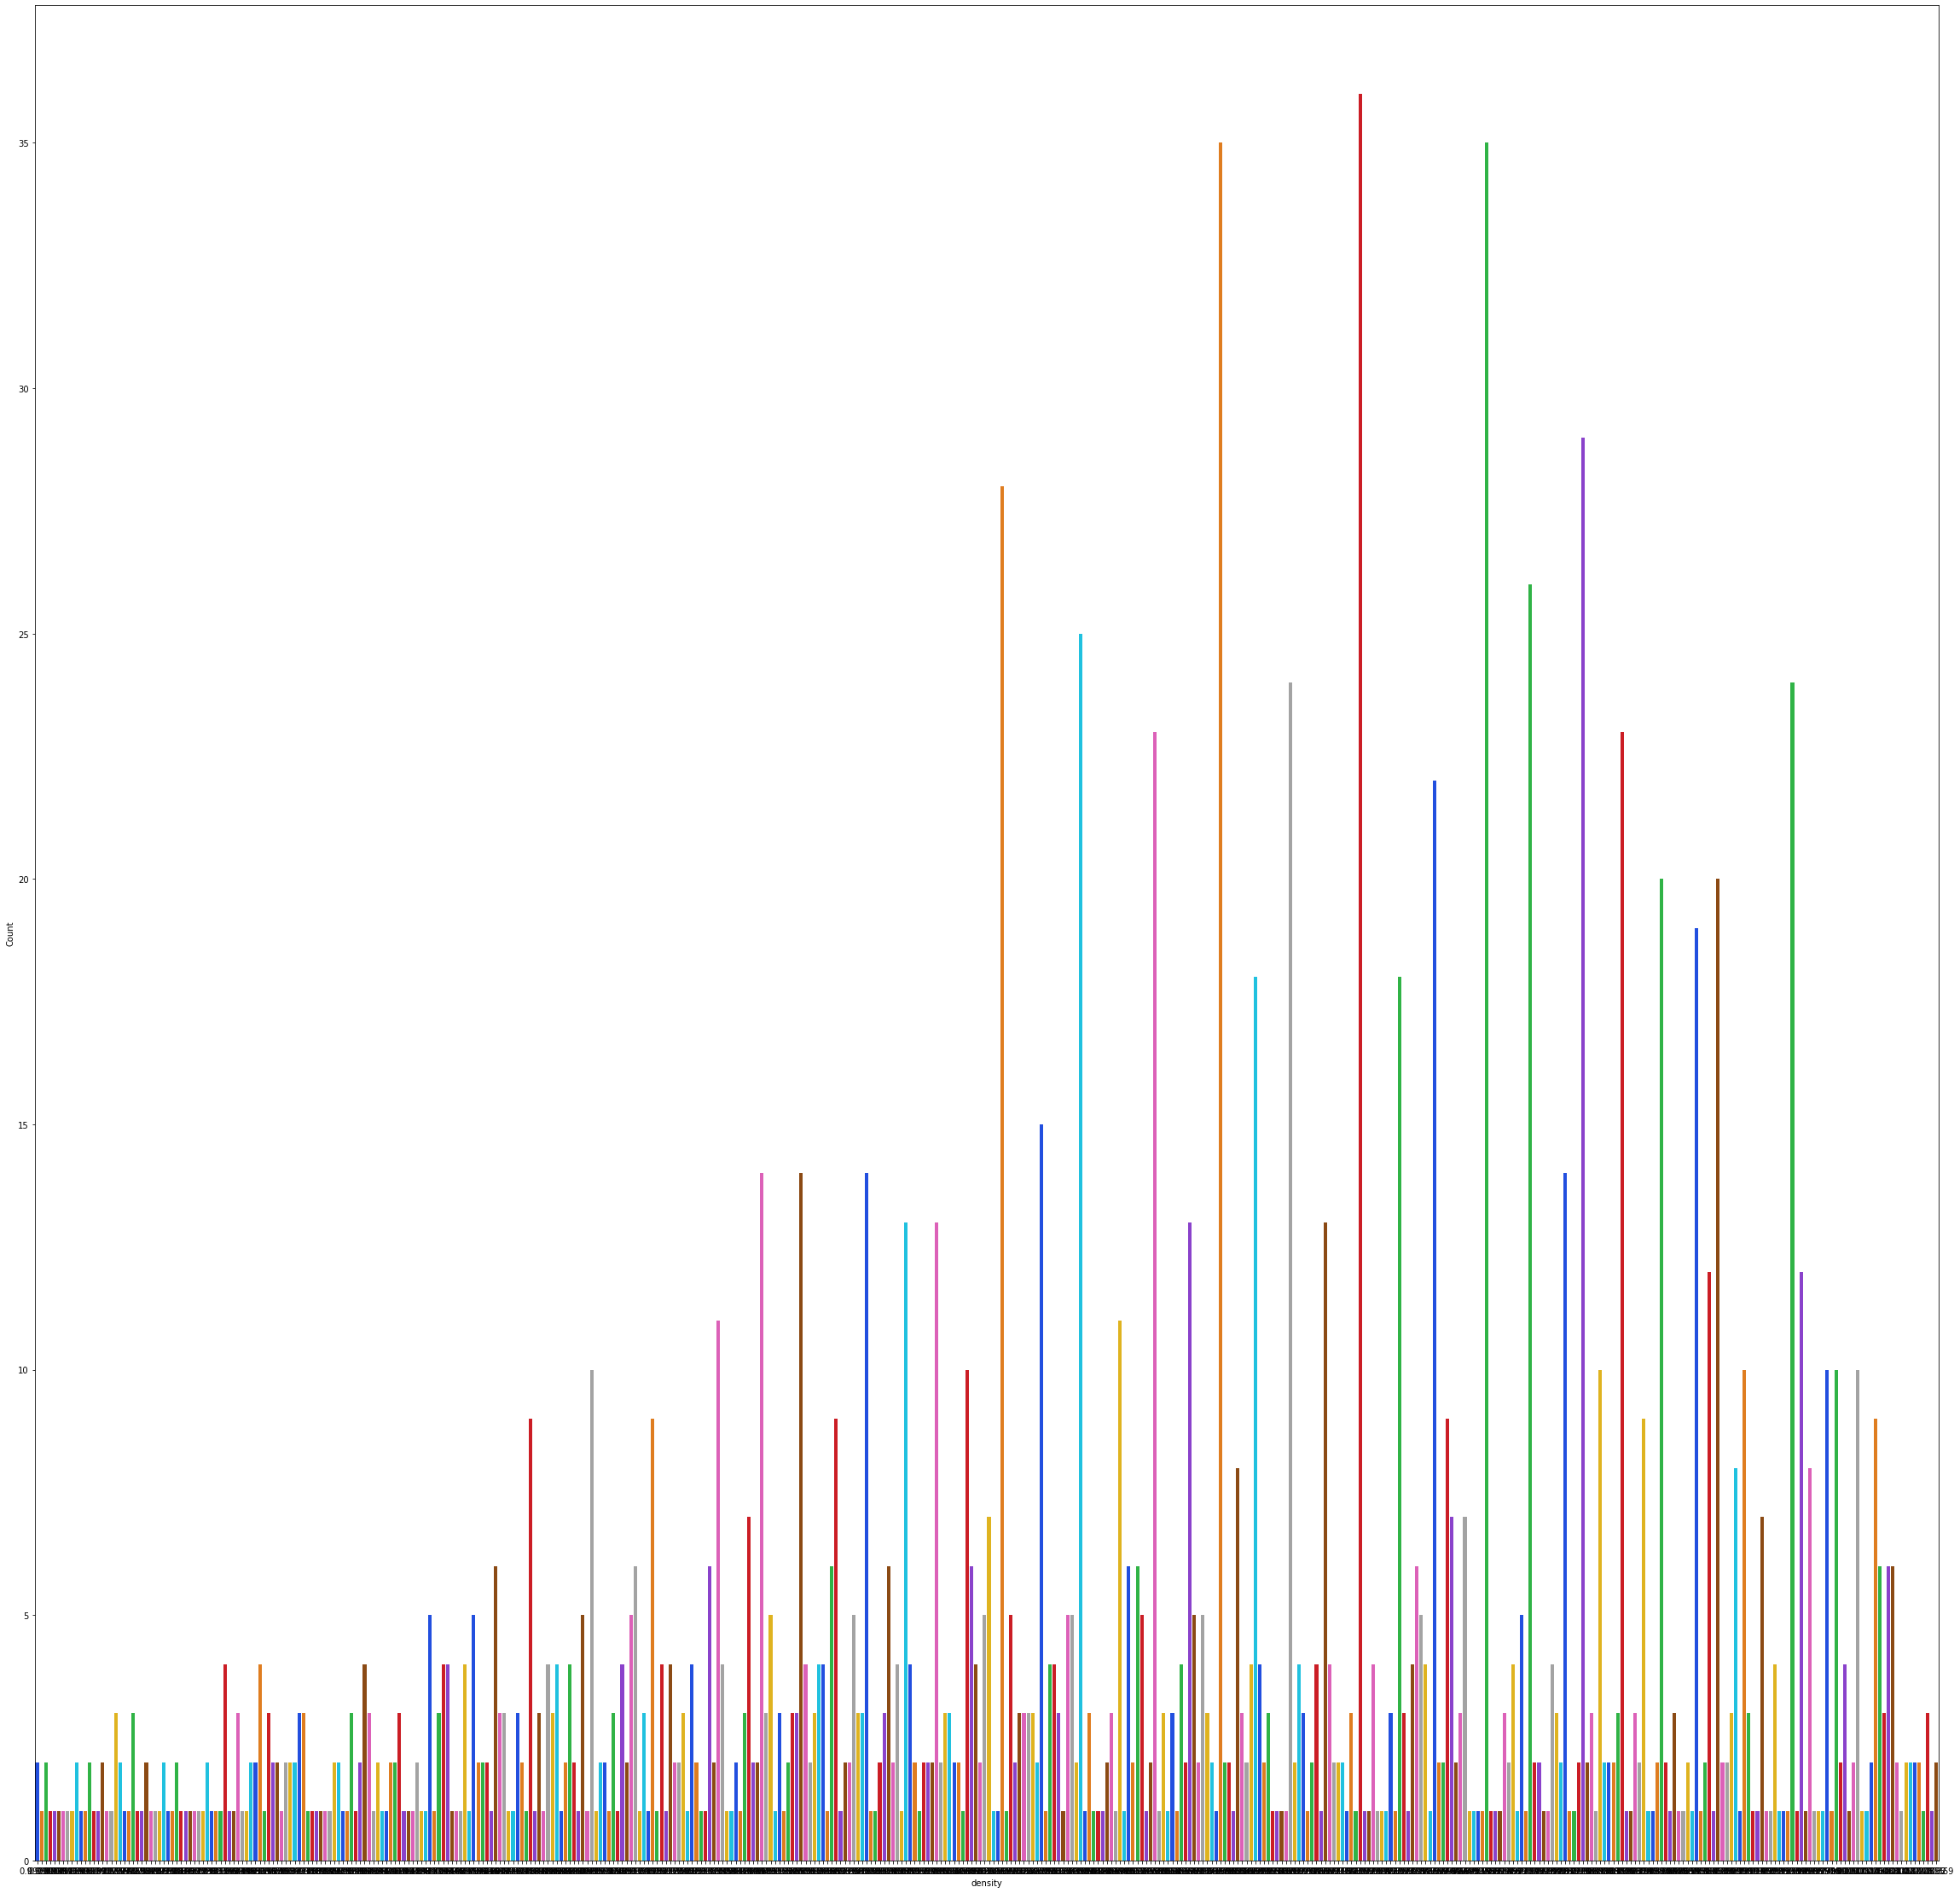

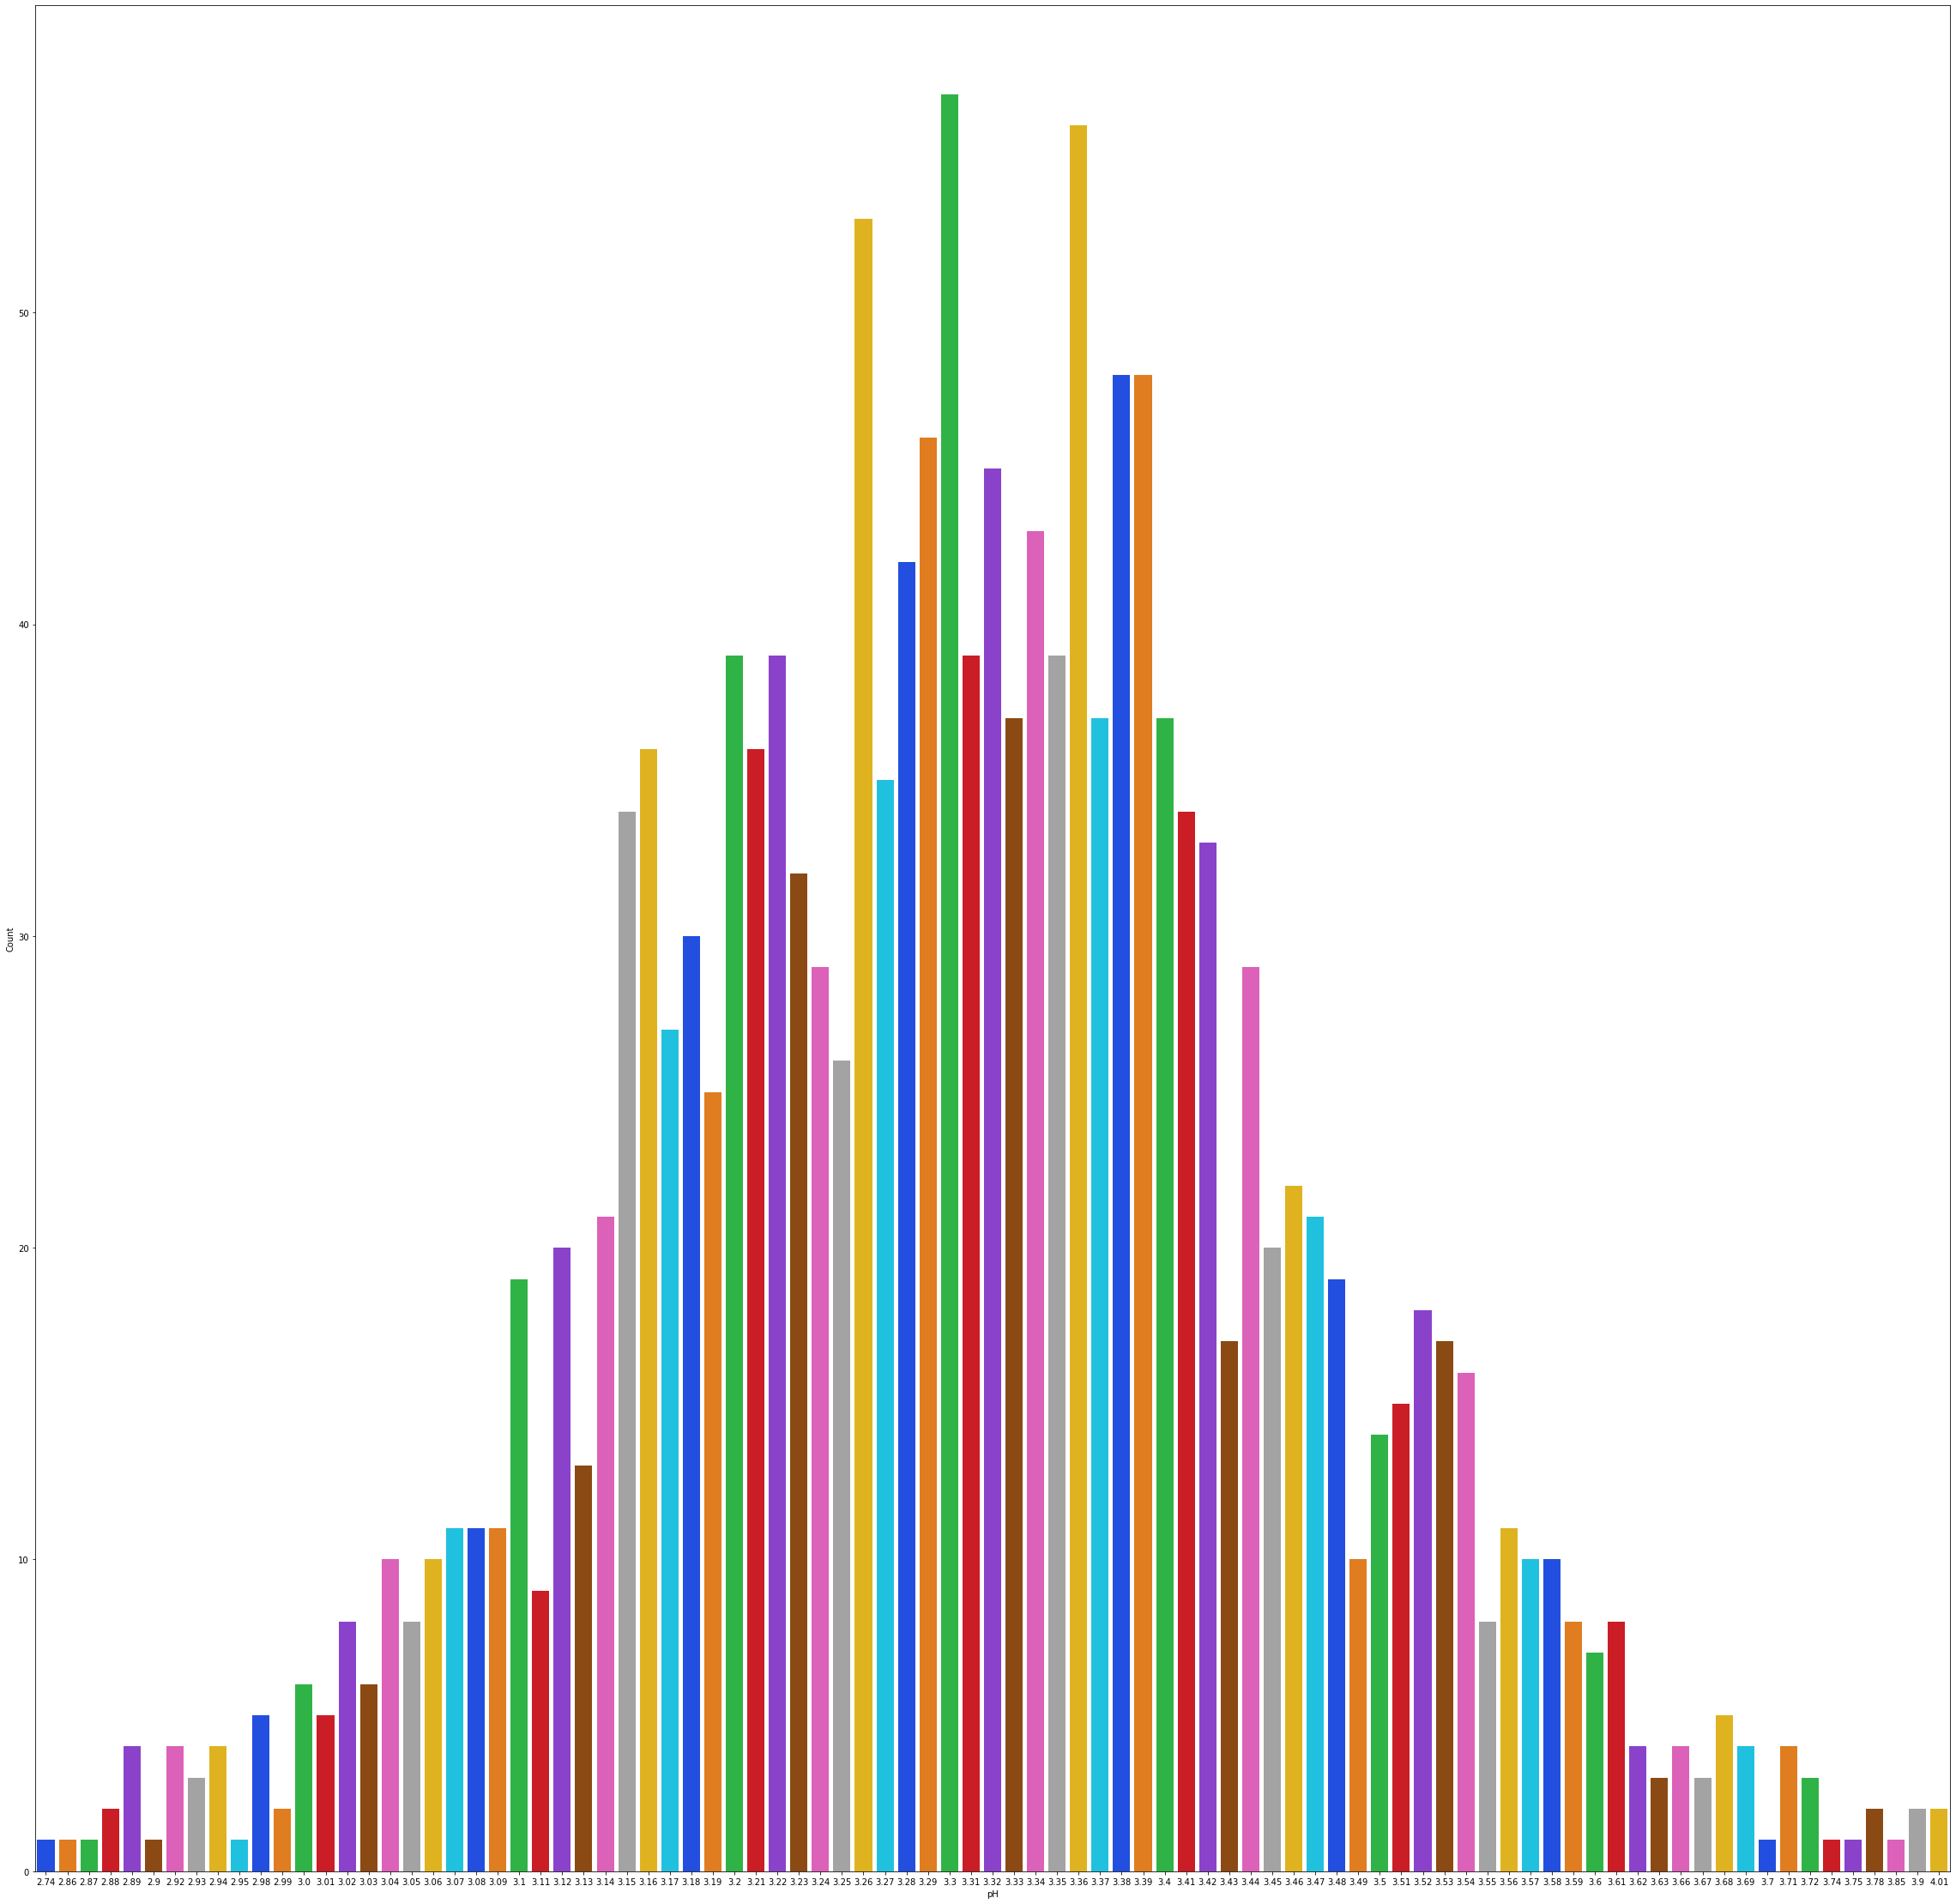

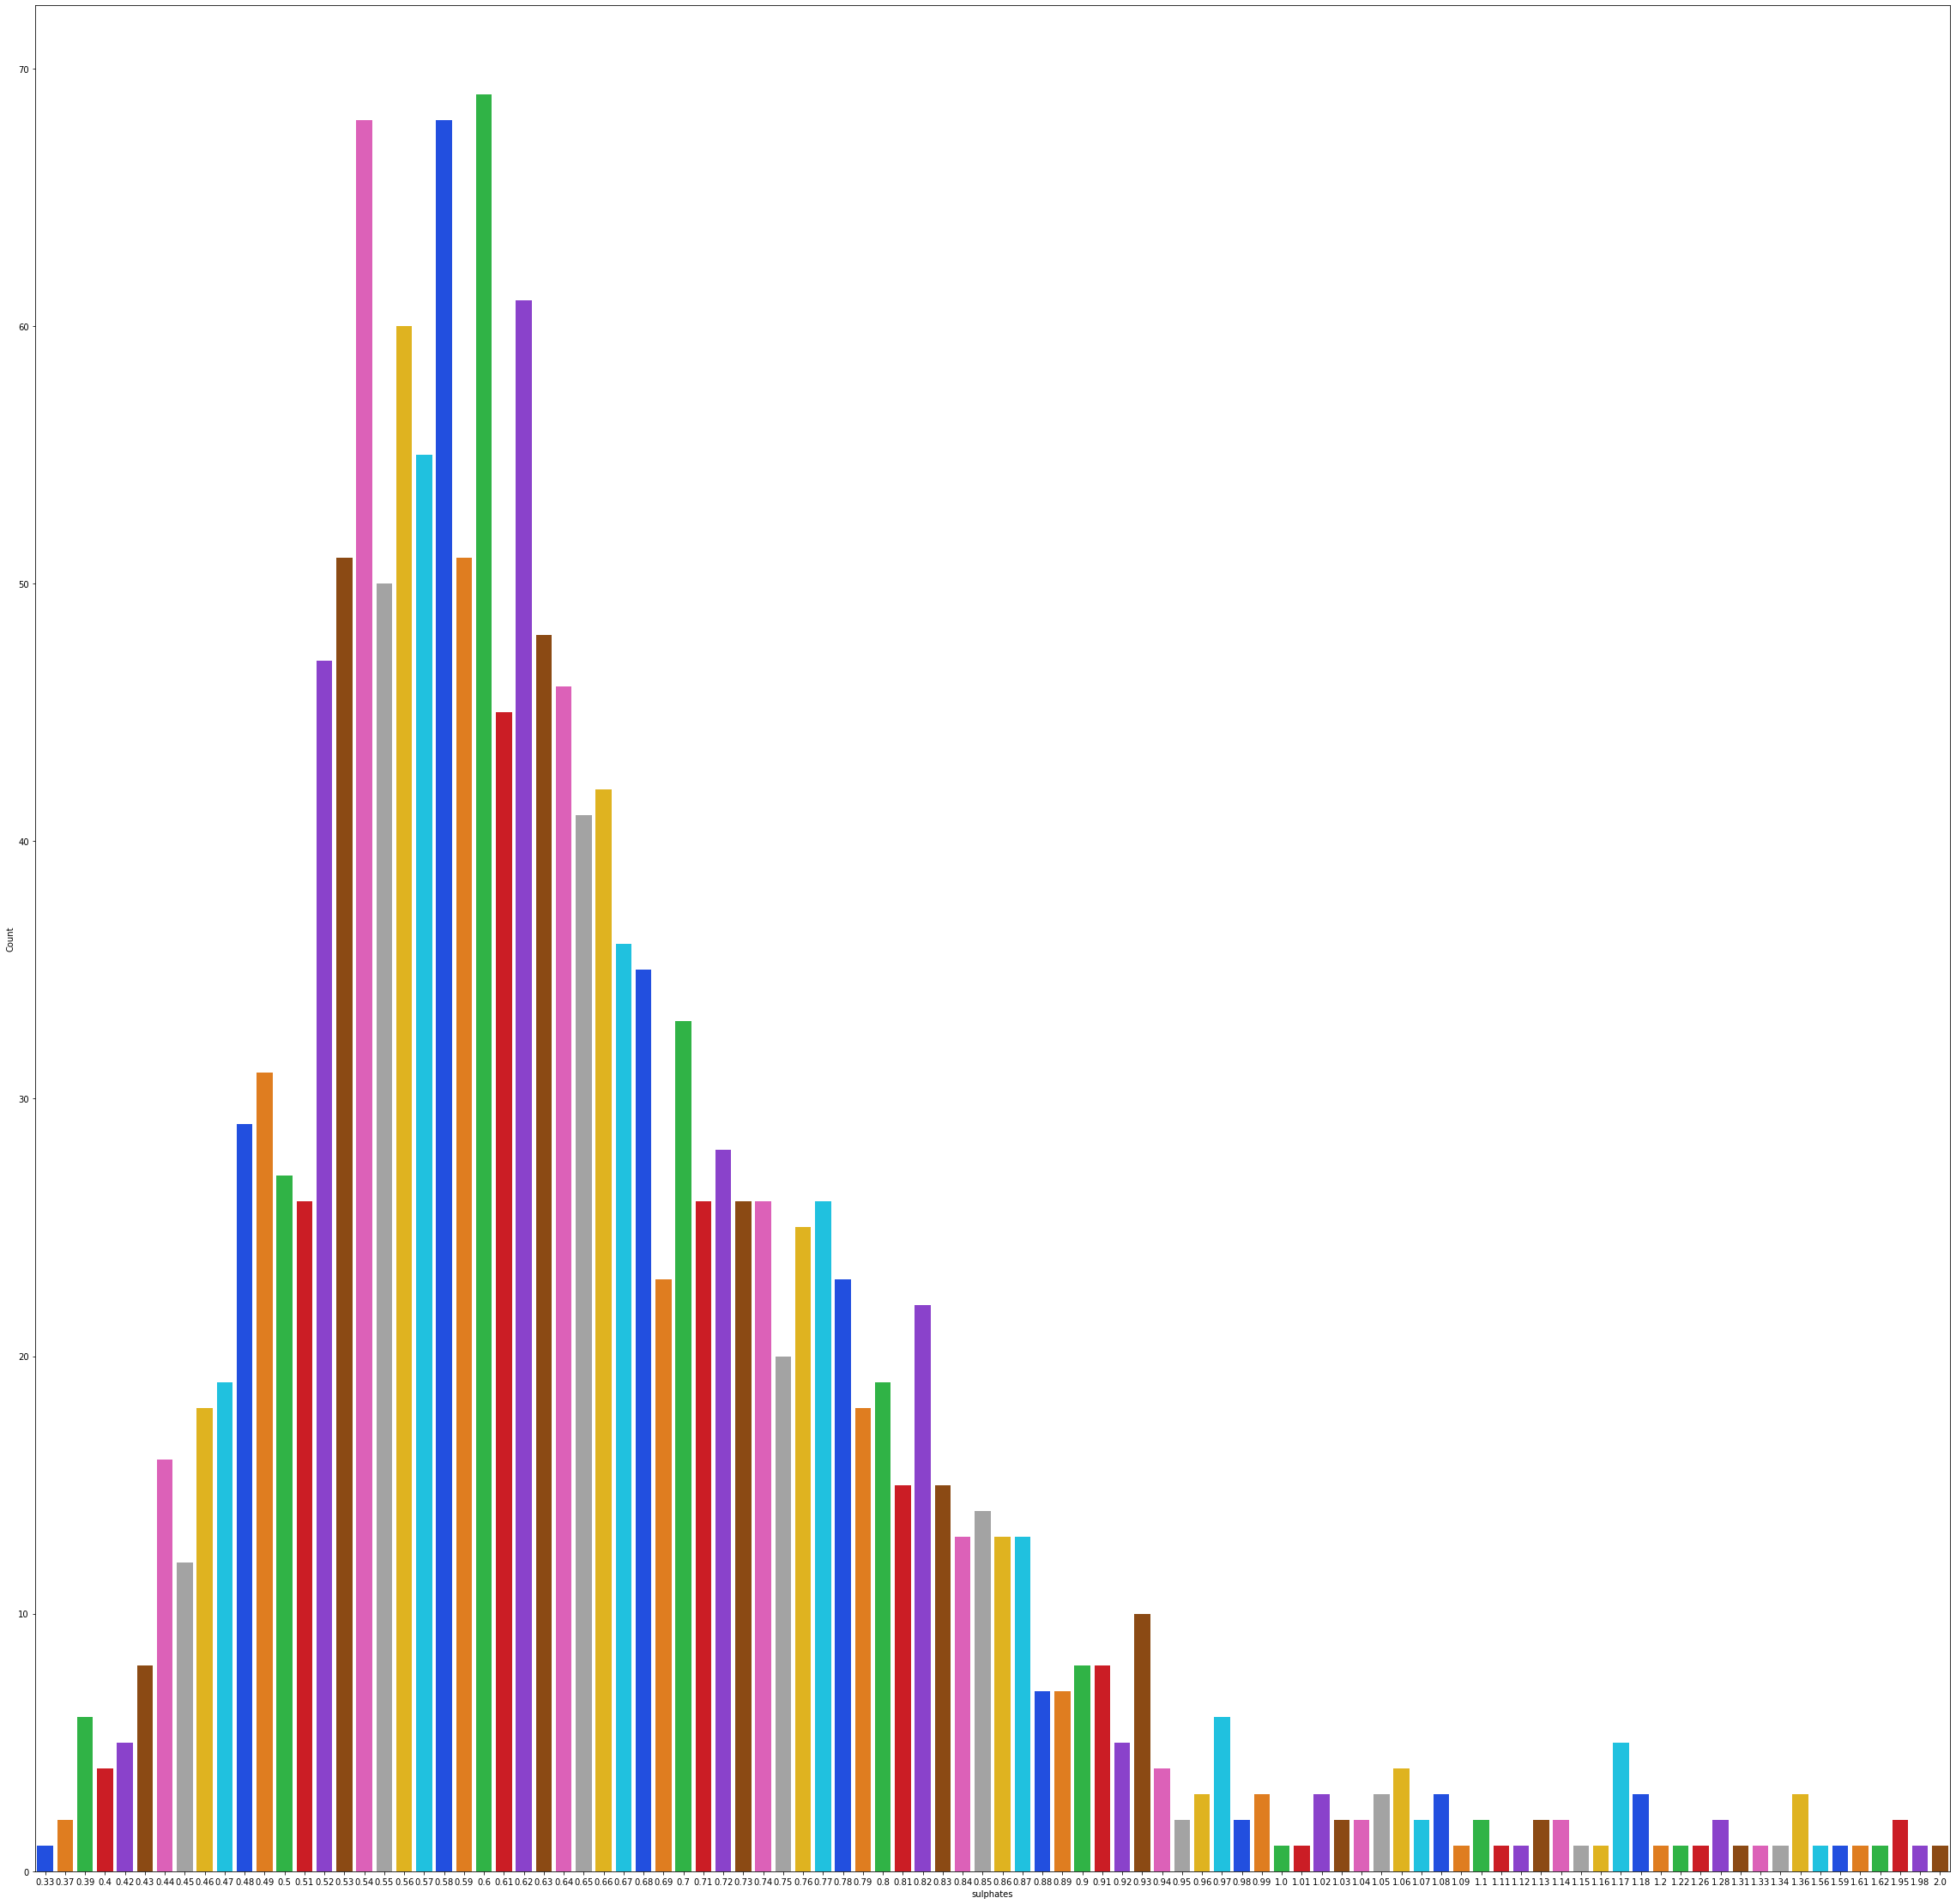

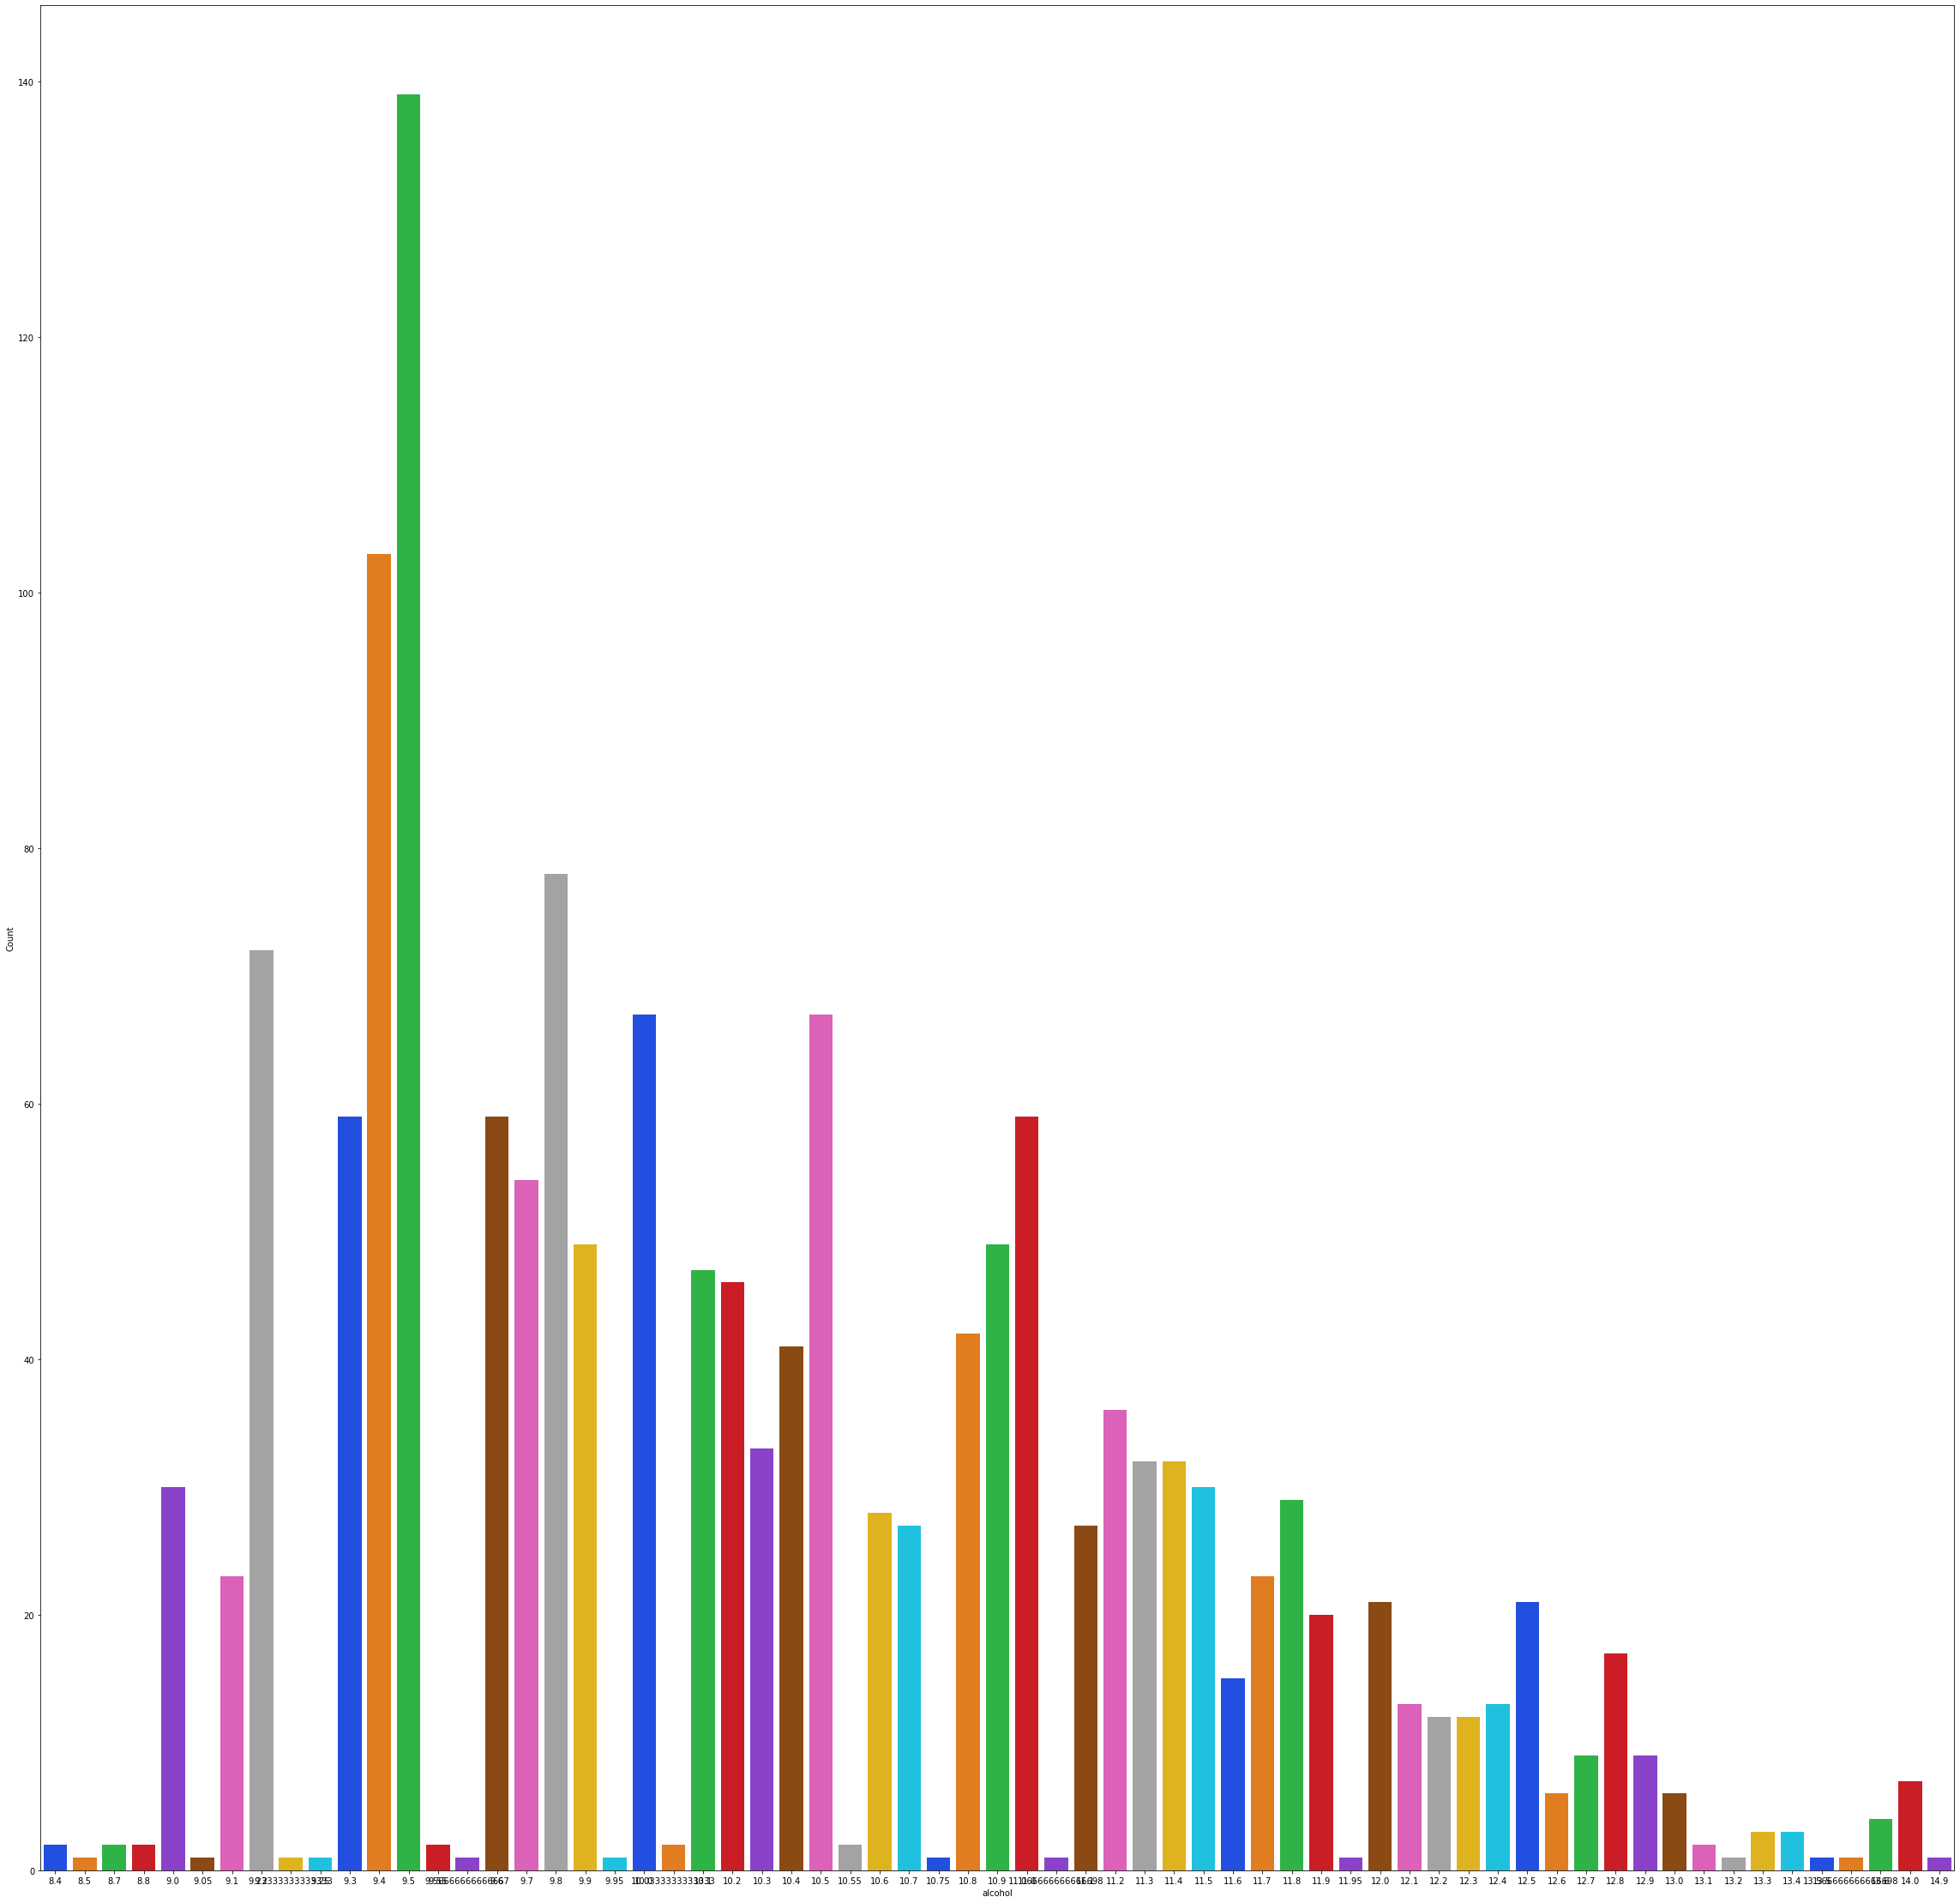

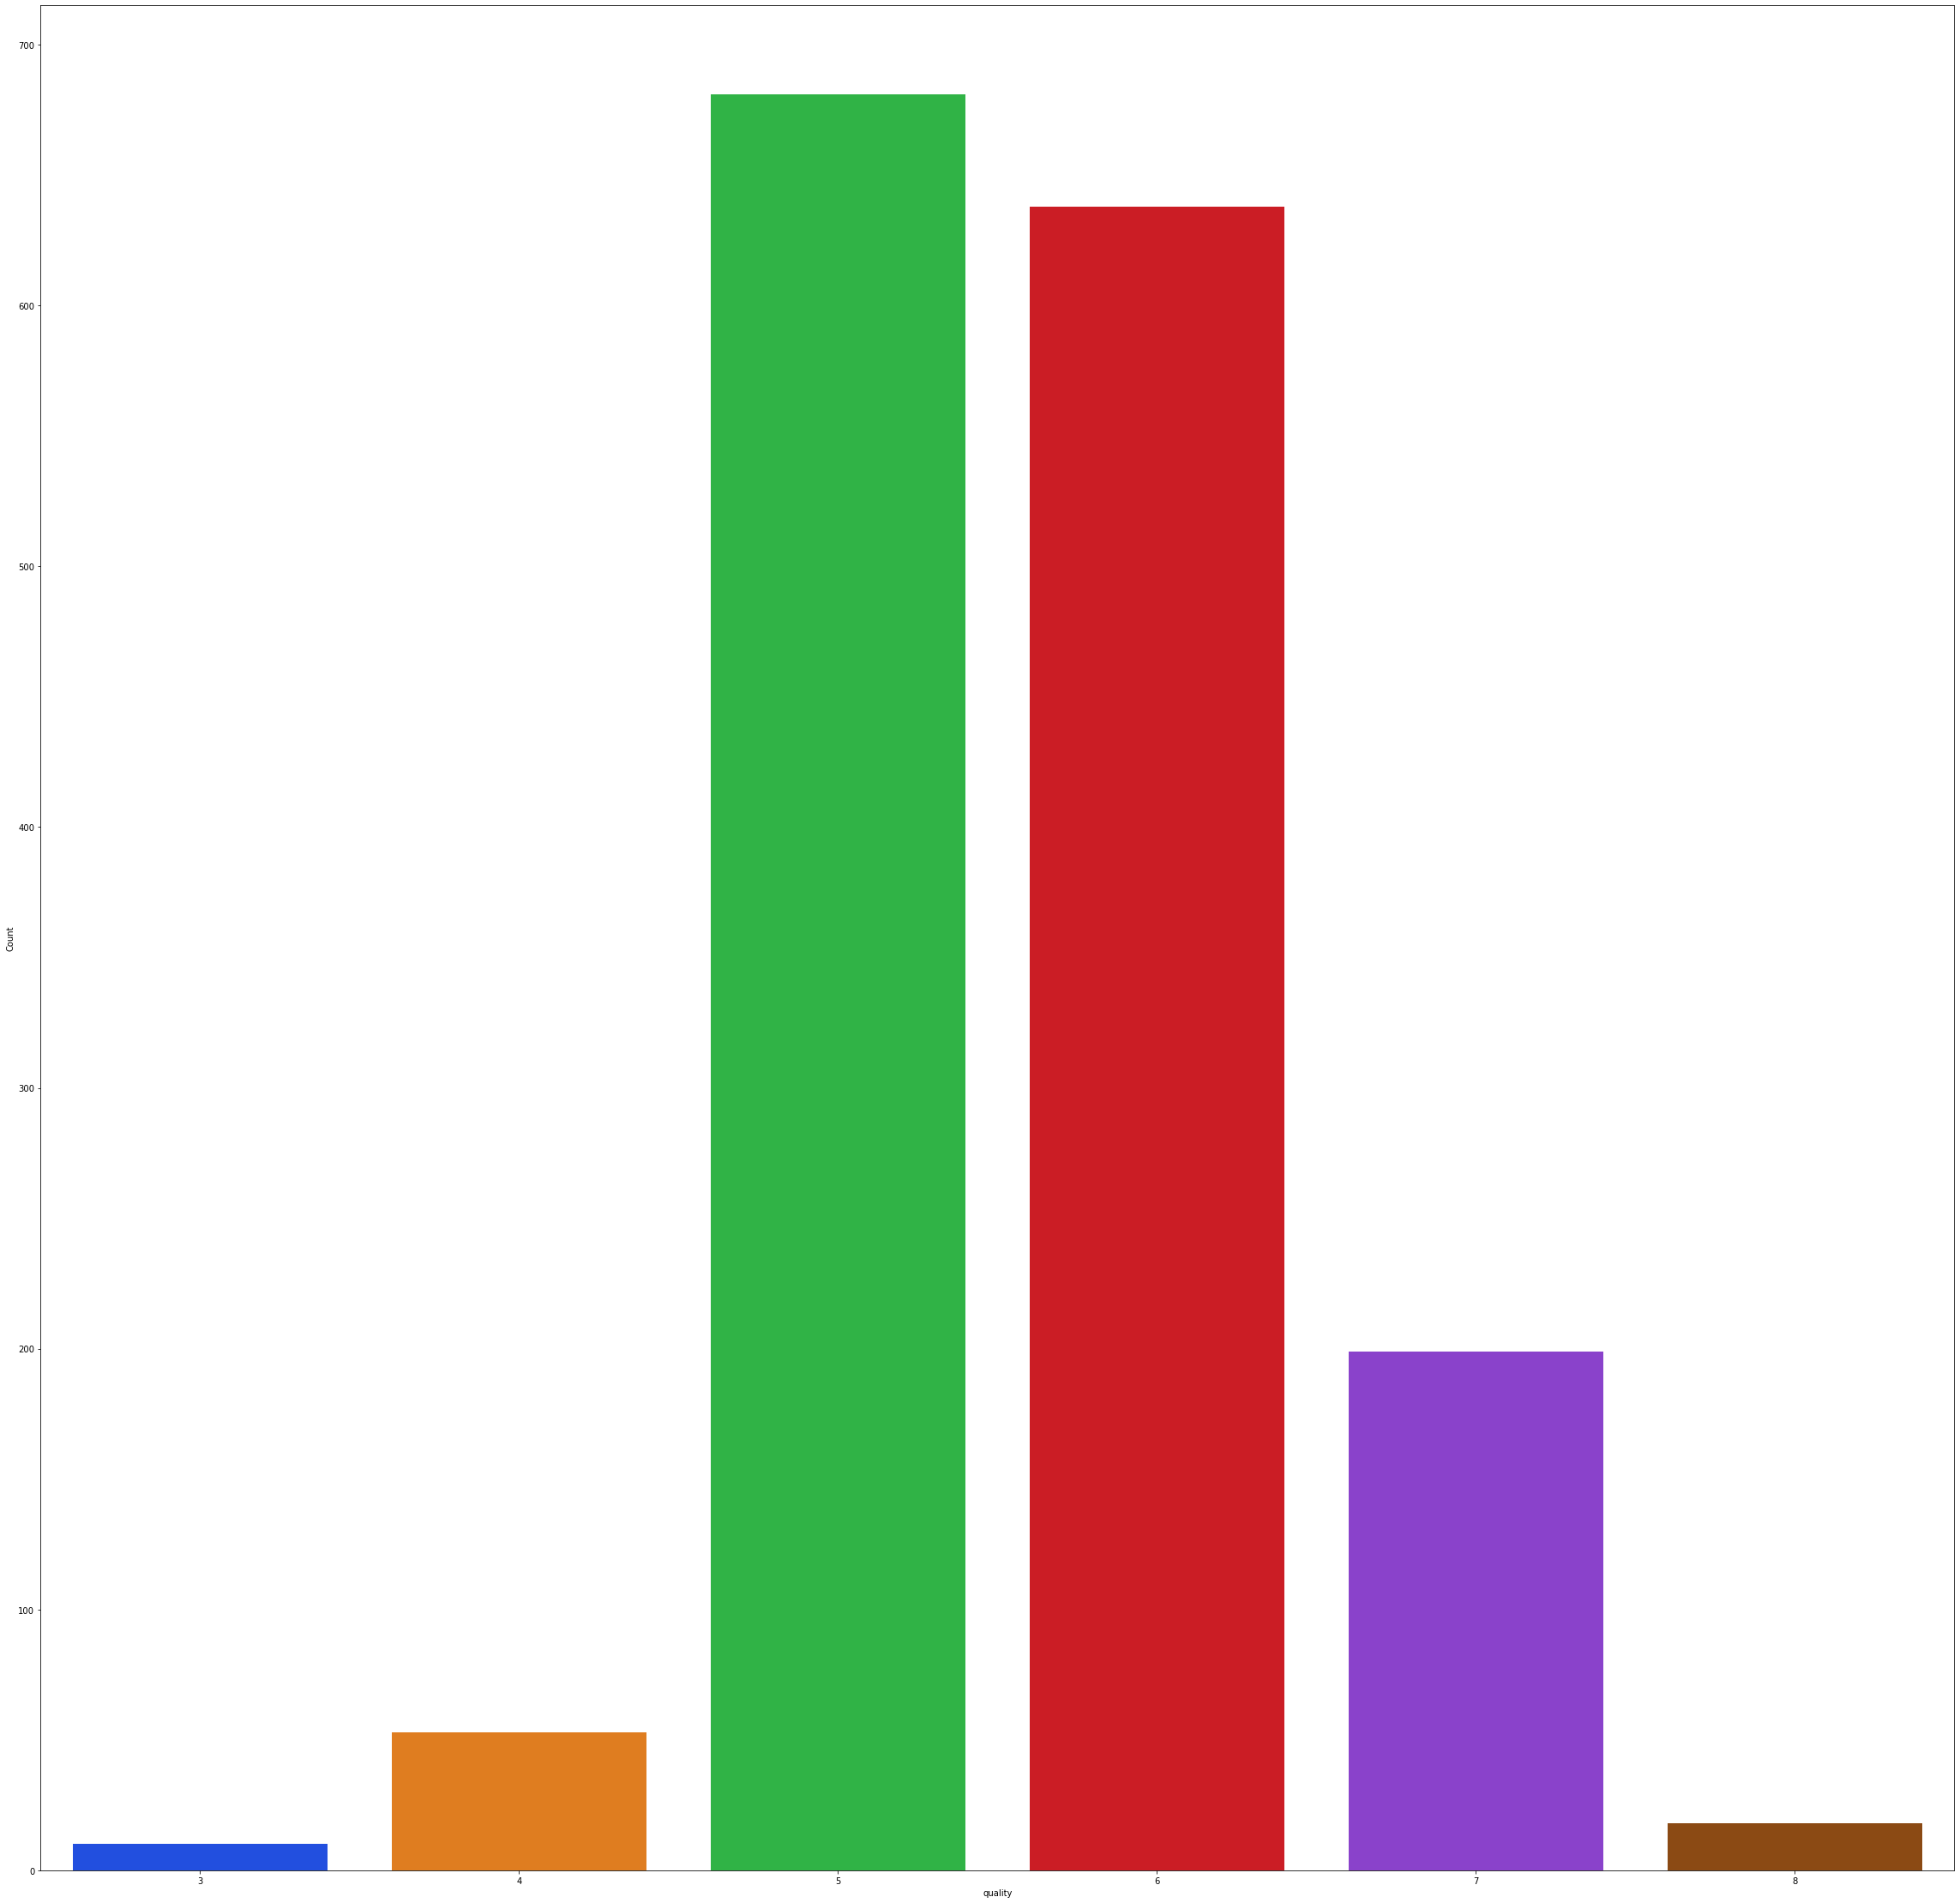

In [20]:
for col in df.columns:
    plt.figure(figsize=(40,40))
    sns.countplot(df[col],palette='bright')
    plt.ylabel('Count')
#    plt.title(col.title())
#    plt.xlabel(col.title())
plt.show()

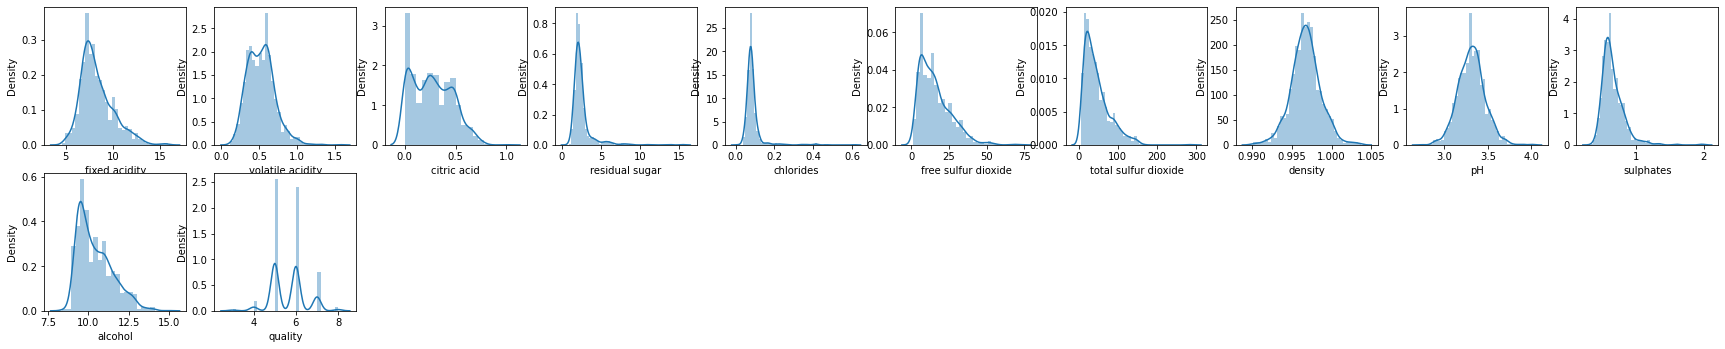

In [21]:
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df[collist[i]])

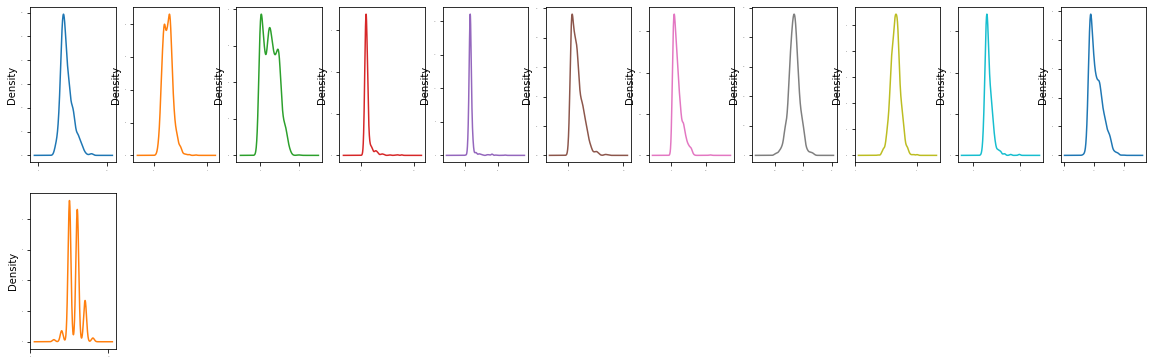

In [22]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

### Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between pH and fixed acidity'}, xlabel='pH', ylabel='fixed acidity'>

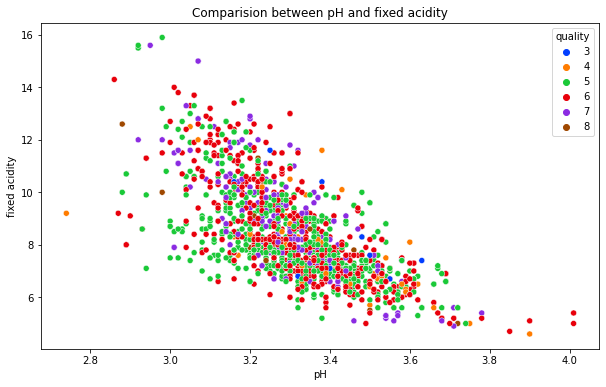

In [23]:
plt.figure(figsize=[10,6])
plt.title('Comparision between pH and fixed acidity')
sns.scatterplot(df['pH'],df['fixed acidity'],hue=df['quality'],palette='bright')

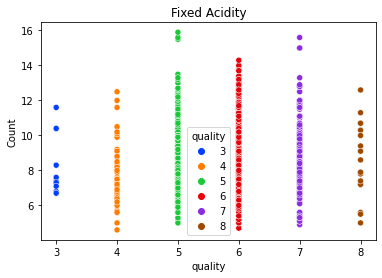

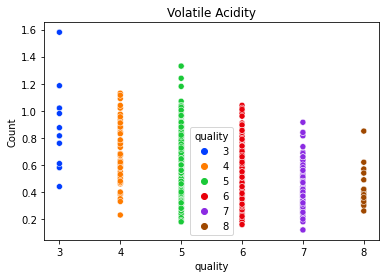

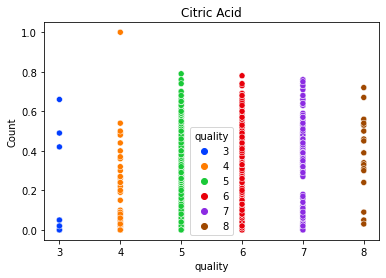

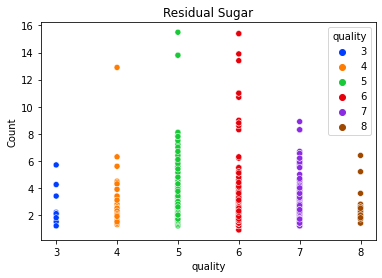

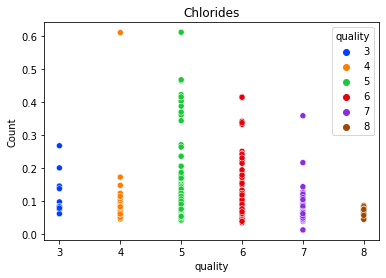

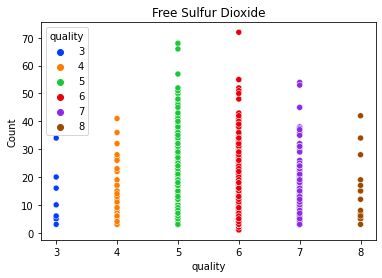

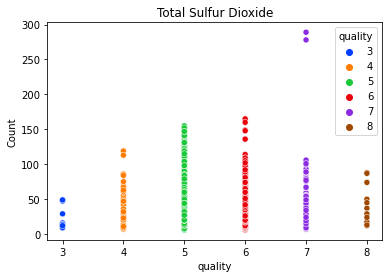

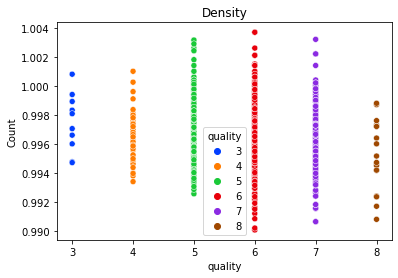

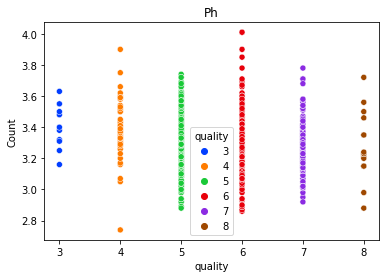

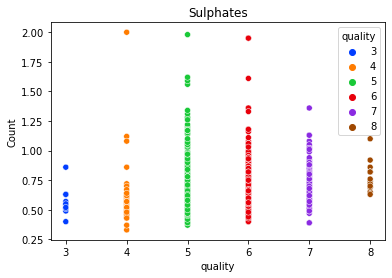

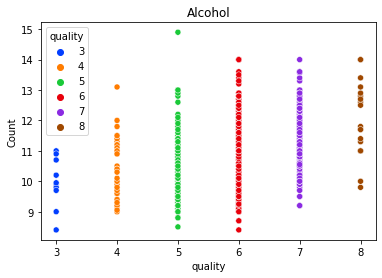

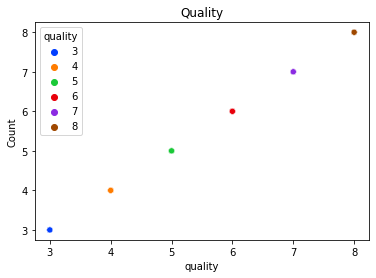

In [24]:
for col in df.columns:
    
    plt.figure()
    sns.scatterplot(df['quality'],df[col],hue=df['quality'],palette='bright')
    plt.ylabel('Count')
    plt.title(col.title())
#   plt.xlabel(col.title())
plt.show()

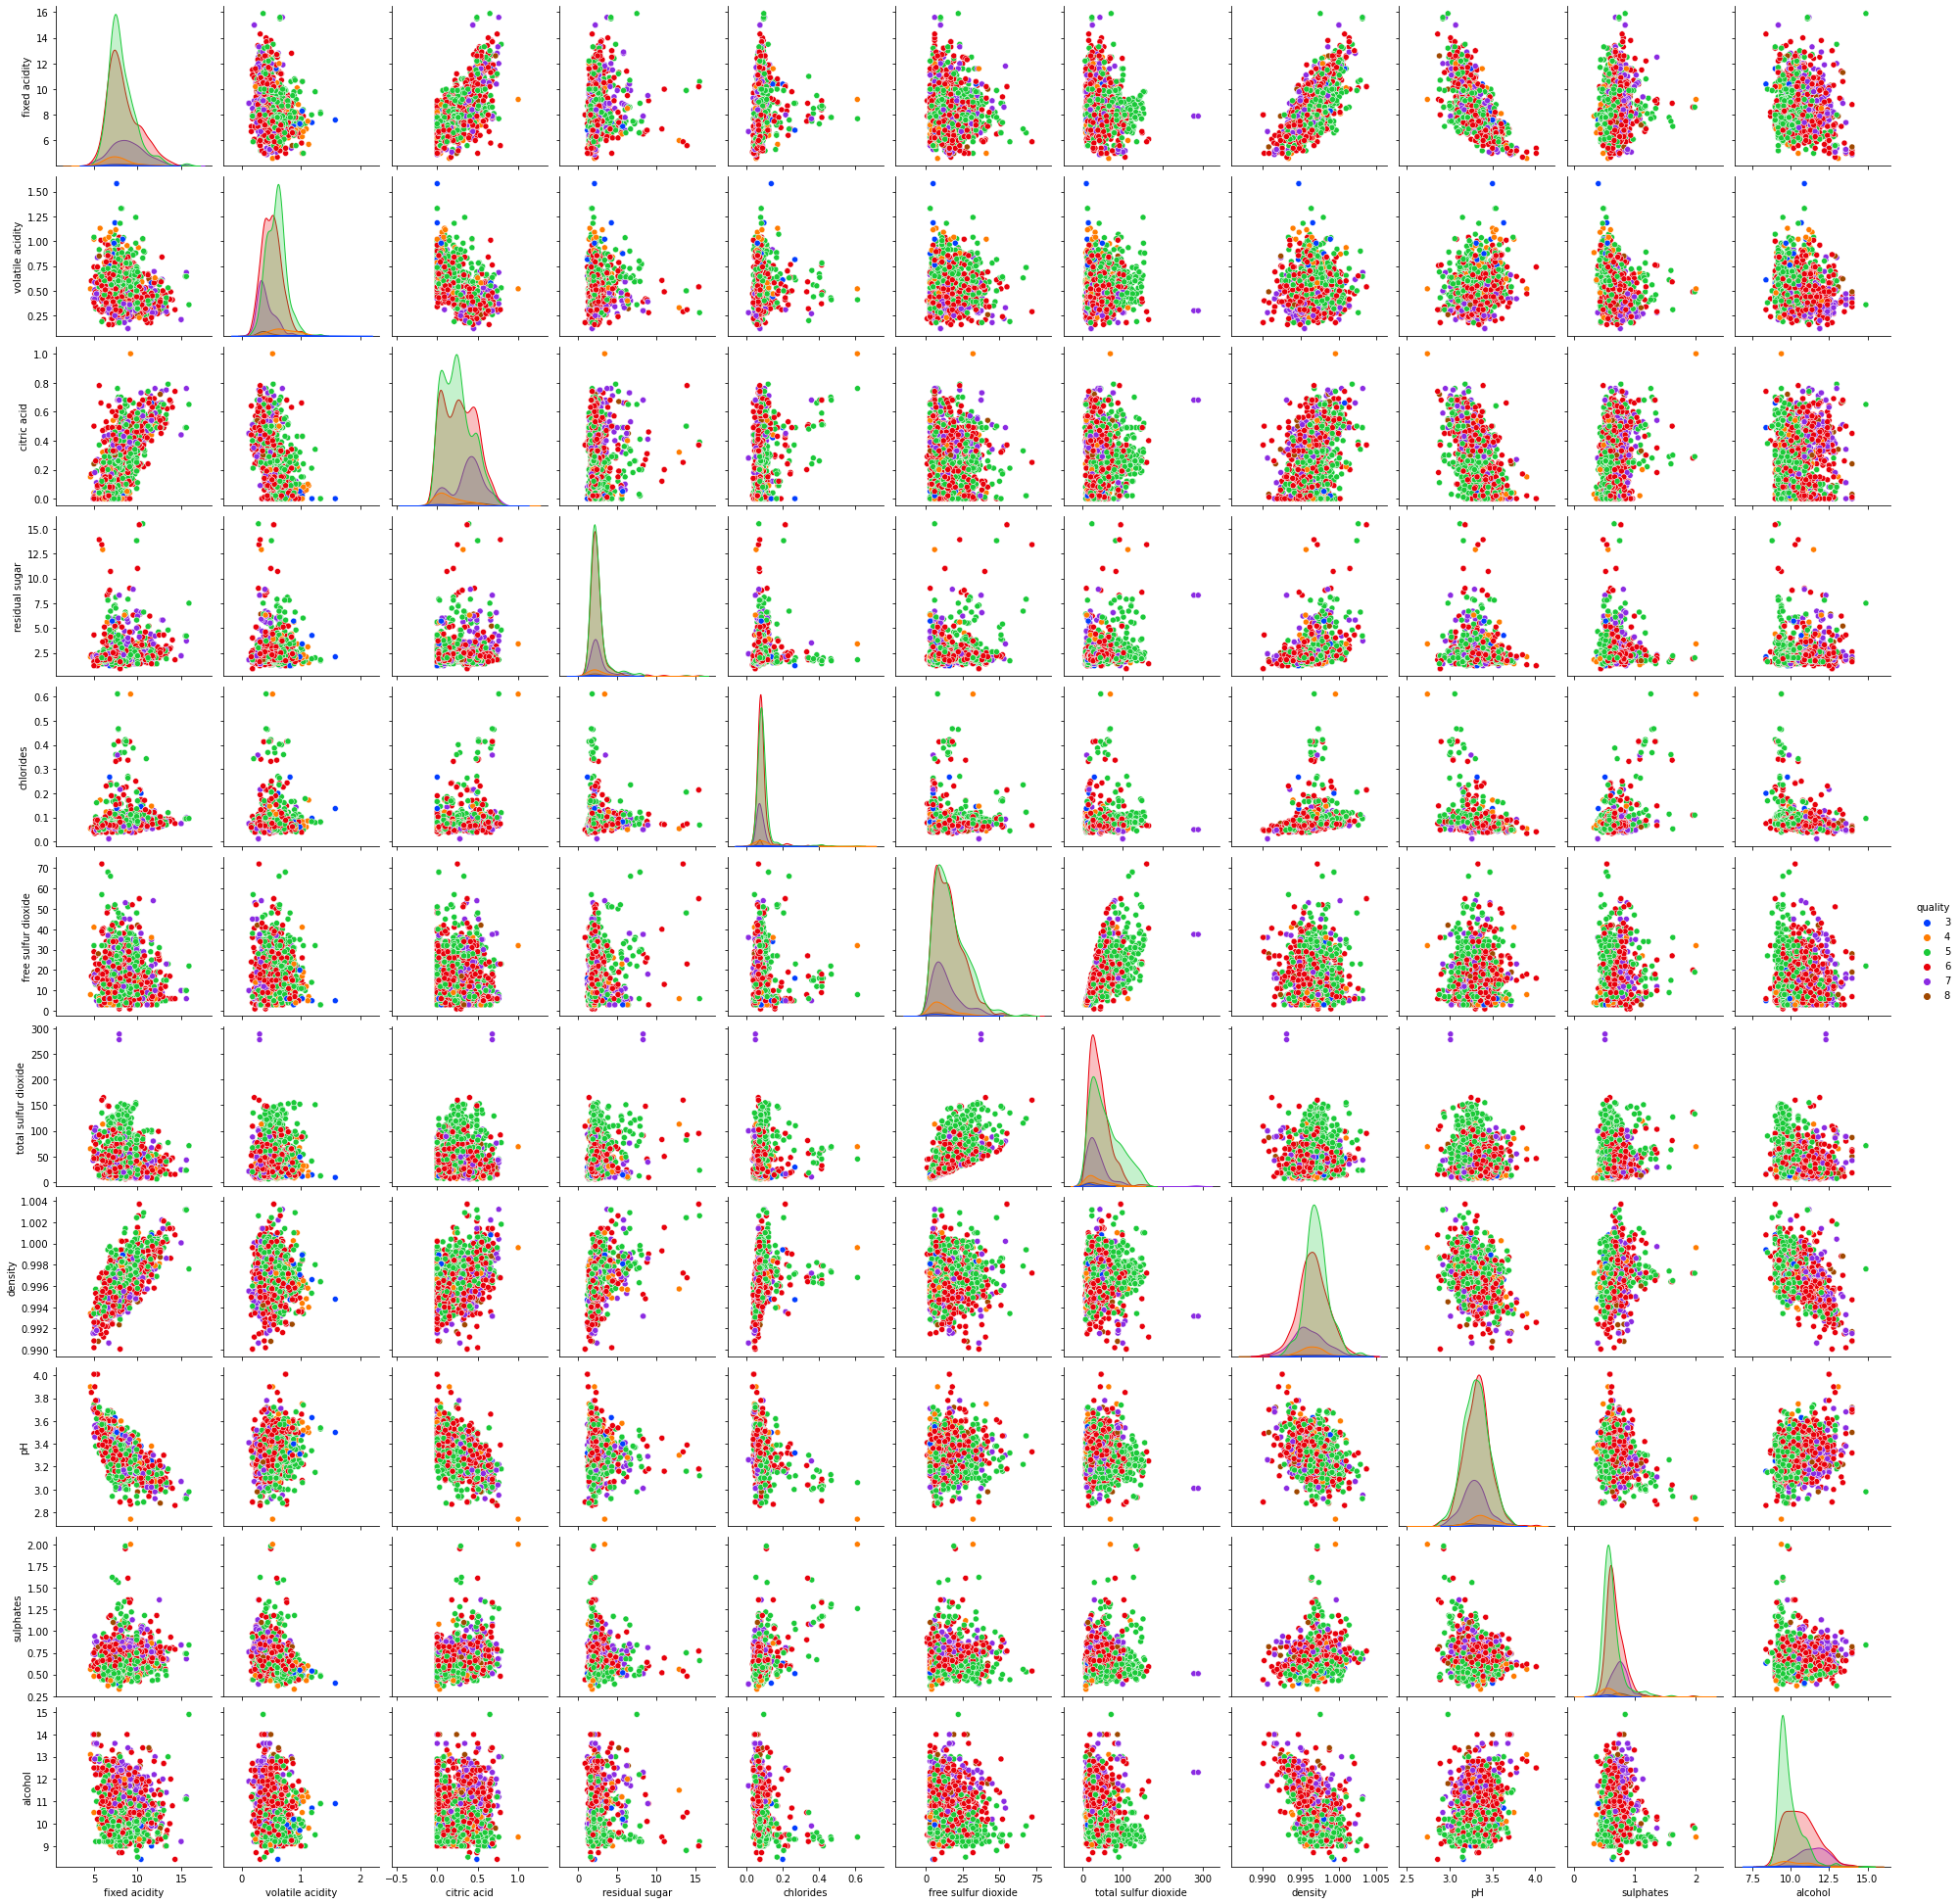

In [26]:
sns.pairplot(df,hue='quality',palette='bright')

## Outliers & Skewness

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [28]:
new_df.shape

(1451, 12)

In [29]:
df.shape

(1599, 12)

In [30]:
((1599-1451)/1599)*100

9.255784865540964

In [31]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [32]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(df)
df_skew=pd.DataFrame(df_skew,columns=df.columns)

In [33]:
df_skew.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
quality                 0.012134
dtype: float64

In [34]:
df_skew.shape

(1599, 12)

In [35]:
df_skew.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [36]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [37]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Model Building

In [38]:
#Splitting the independent variables and the Target variables in x & y
x=df.drop("quality",axis=1)
y=df["quality"]

In [41]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.6420454545454546   at random_state: 17


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=17)

In [43]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)
x_t = scalar.transform(x)
print(x_t)
#print(x_test)

[[-0.52712672  0.99398181 -1.38419301 ...  1.30476975 -0.59809858
  -0.98566297]
 [-0.29953038  2.02273018 -1.38419301 ... -0.69595353  0.11429836
  -0.60158837]
 [-0.29953038  1.33689793 -1.18029786 ... -0.30871677 -0.06380088
  -0.60158837]
 ...
 [-1.15301664 -0.09191924 -0.72153375 ...  0.72391461  0.52986324
   0.55063543]
 [-1.38061298  0.67964204 -0.77250754 ...  1.69200652  0.29239759
  -0.21751377]
 [-1.32371389 -1.23497297  1.01157509 ...  0.53029622 -0.00443447
   0.55063543]]


In [44]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
preddt=kn.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.5757575757575758
[[  0   1   1   1   0   0]
 [  0   0  14   7   0   0]
 [  1   3 164  53   1   0]
 [  0   1  77 118  20   0]
 [  0   0   8  29  22   0]
 [  0   0   1   3   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        21
           5       0.62      0.74      0.67       222
           6       0.56      0.55      0.55       216
           7       0.48      0.37      0.42        59
           8       0.00      0.00      0.00         7

    accuracy                           0.58       528
   macro avg       0.28      0.28      0.27       528
weighted avg       0.54      0.58      0.56       528



In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6458333333333334
[[  0   1   2   0   0   0]
 [  0   2  10   9   0   0]
 [  0   3 169  45   4   1]
 [  1   5  51 134  23   2]
 [  0   1   7  15  35   1]
 [  0   0   0   3   3   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.17      0.10      0.12        21
           5       0.71      0.76      0.73       222
           6       0.65      0.62      0.64       216
           7       0.54      0.59      0.56        59
           8       0.20      0.14      0.17         7

    accuracy                           0.65       528
   macro avg       0.38      0.37      0.37       528
weighted avg       0.63      0.65      0.64       528



In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.6799242424242424
[[  0   1   2   0   0   0]
 [  0   0  16   5   0   0]
 [  0   1 184  36   1   0]
 [  0   0  58 146  12   0]
 [  0   0   3  27  28   1]
 [  0   0   0   5   1   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        21
           5       0.70      0.83      0.76       222
           6       0.67      0.68      0.67       216
           7       0.67      0.47      0.55        59
           8       0.50      0.14      0.22         7

    accuracy                           0.68       528
   macro avg       0.42      0.35      0.37       528
weighted avg       0.65      0.68      0.66       528



In [47]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.6515151515151515
[[  0   0   2   1   0   0]
 [  0   0  17   4   0   0]
 [  0   0 185  36   1   0]
 [  0   0  69 140   7   0]
 [  0   0   4  36  19   0]
 [  0   0   0   4   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        21
           5       0.67      0.83      0.74       222
           6       0.63      0.65      0.64       216
           7       0.63      0.32      0.43        59
           8       0.00      0.00      0.00         7

    accuracy                           0.65       528
   macro avg       0.32      0.30      0.30       528
weighted avg       0.61      0.65      0.62       528



In [48]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(kn,x,y,cv=5)
print("Cross Validation Score of KNeighborsClassifier Model is : ", scr.mean())

Cross Validation Score of KNeighborsClassifier Model is :  0.4421473354231975


In [49]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of DecisionTree Model is : ", scr.mean())

Cross Validation Score of DecisionTree Model is :  0.47591300940438874


In [50]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of RandomForest Model is : ", scr.mean())

Cross Validation Score of RandomForest Model is :  0.5578389498432601


In [51]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score of Support Vector Model is : ", scr.mean())

Cross Validation Score of Support Vector Model is :  0.5021728056426331


In [52]:
from sklearn.model_selection import GridSearchCV
#Creating Parameter list  to pass in GridSearchCV
parameters={'max_depth': np.arange(2,10),
             'criterion': ['gini','entropy']}

#param_grid = {'svc__C': [10.0,1, 0.1],'svc__gamma': [10.0,1, 0.1]}

# Parameter Tuning

In [53]:
gcv=GridSearchCV(RandomForestClassifier(), parameters,cv=5) #Tuning RandomForestClassifier

In [54]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [55]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [56]:
mod=DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=17)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

58.90151515151515


# Hence we have the best model accuracy with DecisionTreeClassifier model.

# Saving the Model

In [57]:
import joblib
joblib.dump(mod,"wine quality.pkl")

['wine quality.pkl']

## Loading the saved model

In [58]:
model=joblib.load("wine quality.pkl")

In [59]:
prediction=model.predict(x_test)

In [60]:
print(accuracy_score(y_test,prediction)*100)

58.90151515151515


In [61]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [62]:
prediction.to_csv('Results.csv') #Saving the predictions

In [63]:
prediction

,0
0,5
1,6
2,5
3,5
4,6
...,...
523,6
524,7
525,5
526,6


### Hence Checked for Saving ,Loading ,predicting